# Credit Card Approval Capstone Project 


# Business objective

 The objective of this project is to develop a predictive model for credit card approval that enhances the bank's ability to assess and evaluate the creditworthiness of applicants, reducing the risk of defaults and improving the overall quality of credit card portfolios.

Project proposal to predict credit card approval

1. Why is your proposal important in today's world? How predicting a good client is worthy for a bank?

- In today's world, where the banking industry faces increasing competition and risks, predicting a good client is crucial for a bank. By accurately assessing creditworthiness and identifying clients who are likely to be responsible borrowers, banks can minimize the risk of defaults and make informed lending decisions. This leads to improved portfolio quality, reduced losses, and better overall financial stability for the bank.

2. How is it going to impact the banking sector?

- The proposed credit card approval prediction model will have a significant impact on the banking sector. It will enhance the credit assessment process by leveraging data-driven techniques to evaluate customer information effectively. This will enable banks to make more accurate and efficient credit card approval decisions, leading to improved risk management, enhanced customer satisfaction, and increased profitability.

3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in the future for any bank in India?

- The proposed method fills the gap in the knowledge by utilizing advanced analytics and machine learning techniques to predict credit card approval. It provides a data-driven approach to assess creditworthiness beyond traditional credit bureau scores. This method can be immensely helpful for banks in India and worldwide as it improves the accuracy and efficiency of credit decisions, reduces the risk of defaults, and enhances overall credit portfolio management.

# 0. import the necessary packages

In [541]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
import missingno as msno
from scipy import stats
from datetime import datetime, timedelta
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


# 1. Get the data

## 1.1 import csv file

In [12]:
# Load the datasets
credit_card_df = pd.read_csv("Credit_card.csv")
credit_card_label_df=pd.read_csv("Credit_card_label.csv")


In [28]:
# Merge the datasets based on the common identifier
cc_full_data_df = pd.merge(credit_card_df, credit_card_label_df, on="Ind_ID", how="inner")

# Verify the merged dataset
print(cc_full_data_df.head())

#shape of full data
cc_full_data_df.shape


    Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0        

(1548, 19)

Hypotheses:

- Hypothesis 1: Annual income will have a positive correlation with credit card approval. Higher income individuals are more likely to be approved for credit cards.
- Hypothesis 2: Employment status will be an important feature in credit card approval. Employed individuals may have a higher chance of approval compared to unemployed or self-employed individuals.
- Hypothesis 3: Education level will play a role in credit card approval. Higher education levels may be associated with a higher likelihood of approval.
- Hypothesis 4: Marital status could influence credit card approval. Married individuals may have a higher chance of approval compared to single individuals.
- Hypothesis 5: Age might be a significant factor in credit card approval. Younger individuals may have a lower chance of approval compared to older individuals due to limited credit history.
    
    These hypotheses provide a starting point for exploring the relationships between features and credit card approval. Through data analysis and machine learning modeling, we can test these hypotheses and identify the most influential factors for predicting credit card approval.

    To compare and justify our model against other possible models, we will evaluate the performance of multiple machine learning algorithms using relevant cost functions such as accuracy, precision, recall, and F1-score.

## 1.2 creating the target variable

In [29]:
# Select the target variable
target_variable = cc_full_data_df['label']

# Verify the extracted target variable
print(target_variable)


0       1
1       1
2       1
3       1
4       1
       ..
1543    0
1544    0
1545    0
1546    0
1547    0
Name: label, Length: 1548, dtype: int64


## 1.3 Rename features

In [66]:
# rename the features to a more readable feature names
cc_full_data_df = cc_full_data_df.rename(columns={
    'GENDER':'Gender',
    'Car_Owner':'Has a car',
    'Propert_Owner':'Has a property',
    'CHILDREN':'Children count',
    'Annual_income':'Income',
    'Type_Income':'Employment status',
    'EDUCATION':'Education level',
    'Marital_status':'Marital status',
    'Housing_type':'Dwelling',
    'Birthday_count':'Age',
    'Employed_days': 'Employment length',
    'Mobile_phone': 'Has a mobile phone',
    'Work_Phone': 'Has a work phone',
    'Phone': 'Has a phone',
    'EMAIL_ID': 'Has an email',
    'Type_Occupation': 'Job title',
    'Family_Members': 'Family member count',
    'label' : 'Is high risk'
    })

## 1.4 Split the data into training and test sets, creating a copy of the datasets

In [68]:
# Split the data into train and test
train_df_original, test_df_original = data_split(cc_full_data_df, test_size=0.2)

# Verify the shapes of the train and test sets
print("Training set shape:", train_df_original.shape)
print("Testing set shape:", test_df_original.shape)


Training set shape: (1238, 19)
Testing set shape: (310, 19)


In [69]:
# creating a copy of the dataset so that the original stays untouched
cc_train_copy = train_df_original.copy()
cc_test_copy = test_df_original.copy()

1. What approach are you going to take in order to prove or disprove your hypothesis?

- Data Analysis Approach:

Conduct exploratory data analysis (EDA) to understand the distribution, summary statistics, and relationships between variables.
Perform statistical tests, such as correlation analysis, t-tests, chi-square tests, or ANOVA, to validate the hypotheses and identify significant associations.
Split the data into training and testing sets for model development and evaluation.


2. What feature engineering techniques will be relevant to your project?

Feature Engineering Techniques:

- Handle missing values: Impute missing values using appropriate methods such as mean imputation, median imputation, or advanced imputation techniques like K-nearest neighbors (KNN) or regression imputation.

- Encode categorical variables: Convert categorical variables into numerical representations using techniques like one-hot encoding or label encoding.

- Scaling or normalization: Scale numerical features to ensure they are on a similar scale, such as using techniques like standardization or min-max scaling.
- Feature selection: Identify the most relevant features that contribute significantly to credit card approval using techniques like feature importance, correlation analysis, or stepwise selection.

3. Please justify your data analysis approach.

- Justification of Data Analysis Approach:

EDA allows us to gain insights into the data, identify patterns, and explore the relationships between variables.
Statistical tests help validate the hypotheses and determine the significance of the associations.
Splitting the data into training and testing sets ensures the model's performance is evaluated on unseen data, providing a reliable measure of its effectiveness.
Feature engineering techniques enhance the quality of the data by handling missing values, encoding categorical variables, and optimizing the feature set for modeling.

# 2. Explore the Data

## 2.1 Quick glance at the data

In [70]:
cc_full_data_df.head(5)


Ind_ID Gender Has a car Has a property  Children count    Income  \
0  5008827      M         Y              Y               0  180000.0   
1  5009744      F         Y              N               0  315000.0   
2  5009746      F         Y              N               0  315000.0   
3  5009749      F         Y              N               0       NaN   
4  5009752      F         Y              N               0  315000.0   

      Employment status   Education level Marital status           Dwelling  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

       Age  Employment length  Has a mobile phone  Has a work phone  \
0 -18772.0             365243                   1                 0   
1 -13557.0               -586                   1                 1   
2      NaN               -586                   1                 1   
3 -13557.0               -586                   1                 1   
4 -13557.0               -586                   1                 1   

   Has a phone  Has an email Job title  Family member count  Is high risk  
0            0             0       NaN                    2             1  
1            1             0       NaN                    2             1  
2            1             0       NaN                    2             1  
3            1             0       NaN                    2             1  
4            1             0       NaN                    2             1

In [71]:
cc_full_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ind_ID               1548 non-null   int64  
 1   Gender               1541 non-null   object 
 2   Has a car            1548 non-null   object 
 3   Has a property       1548 non-null   object 
 4   Children count       1548 non-null   int64  
 5   Income               1525 non-null   float64
 6   Employment status    1548 non-null   object 
 7   Education level      1548 non-null   object 
 8   Marital status       1548 non-null   object 
 9   Dwelling             1548 non-null   object 
 10  Age                  1526 non-null   float64
 11  Employment length    1548 non-null   int64  
 12  Has a mobile phone   1548 non-null   int64  
 13  Has a work phone     1548 non-null   int64  
 14  Has a phone          1548 non-null   int64  
 15  Has an email         1548 non-null   i

In [72]:
# Get statistical summary of the dataset
cc_full_data_df.describe()


Ind_ID  Children count        Income           Age  \
count  1.548000e+03     1548.000000  1.525000e+03   1526.000000   
mean   5.078920e+06        0.412791  1.913993e+05 -16040.342071   
std    4.171759e+04        0.776691  1.132530e+05   4229.503202   
min    5.008827e+06        0.000000  3.375000e+04 -24946.000000   
25%    5.045070e+06        0.000000  1.215000e+05 -19553.000000   
50%    5.078842e+06        0.000000  1.665000e+05 -15661.500000   
75%    5.115673e+06        1.000000  2.250000e+05 -12417.000000   
max    5.150412e+06       14.000000  1.575000e+06  -7705.000000   

       Employment length  Has a mobile phone  Has a work phone  Has a phone  \
count        1548.000000              1548.0       1548.000000  1548.000000   
mean        59364.689922                 1.0          0.208010     0.309432   
std        137808.062701                 0.0          0.406015     0.462409   
min        -14887.000000                 1.0          0.000000     0.000000   
25%         -3174.500000                 1.0          0.000000     0.000000   
50%         -1565.000000                 1.0          0.000000     0.000000   
75%          -431.750000                 1.0          0.000000     1.000000   
max        365243.000000                 1.0          1.000000     1.000000   

       Has an email  Family member count  Is high risk  
count   1548.000000          1548.000000   1548.000000  
mean       0.092377             2.161499      0.113049  
std        0.289651             0.947772      0.316755  
min        0.000000             1.000000      0.000000  
25%        0.000000             2.000000      0.000000  
50%        0.000000             2.000000      0.000000  
75%        0.000000             3.000000      0.000000  
max        1.000000            15.000000      1.000000

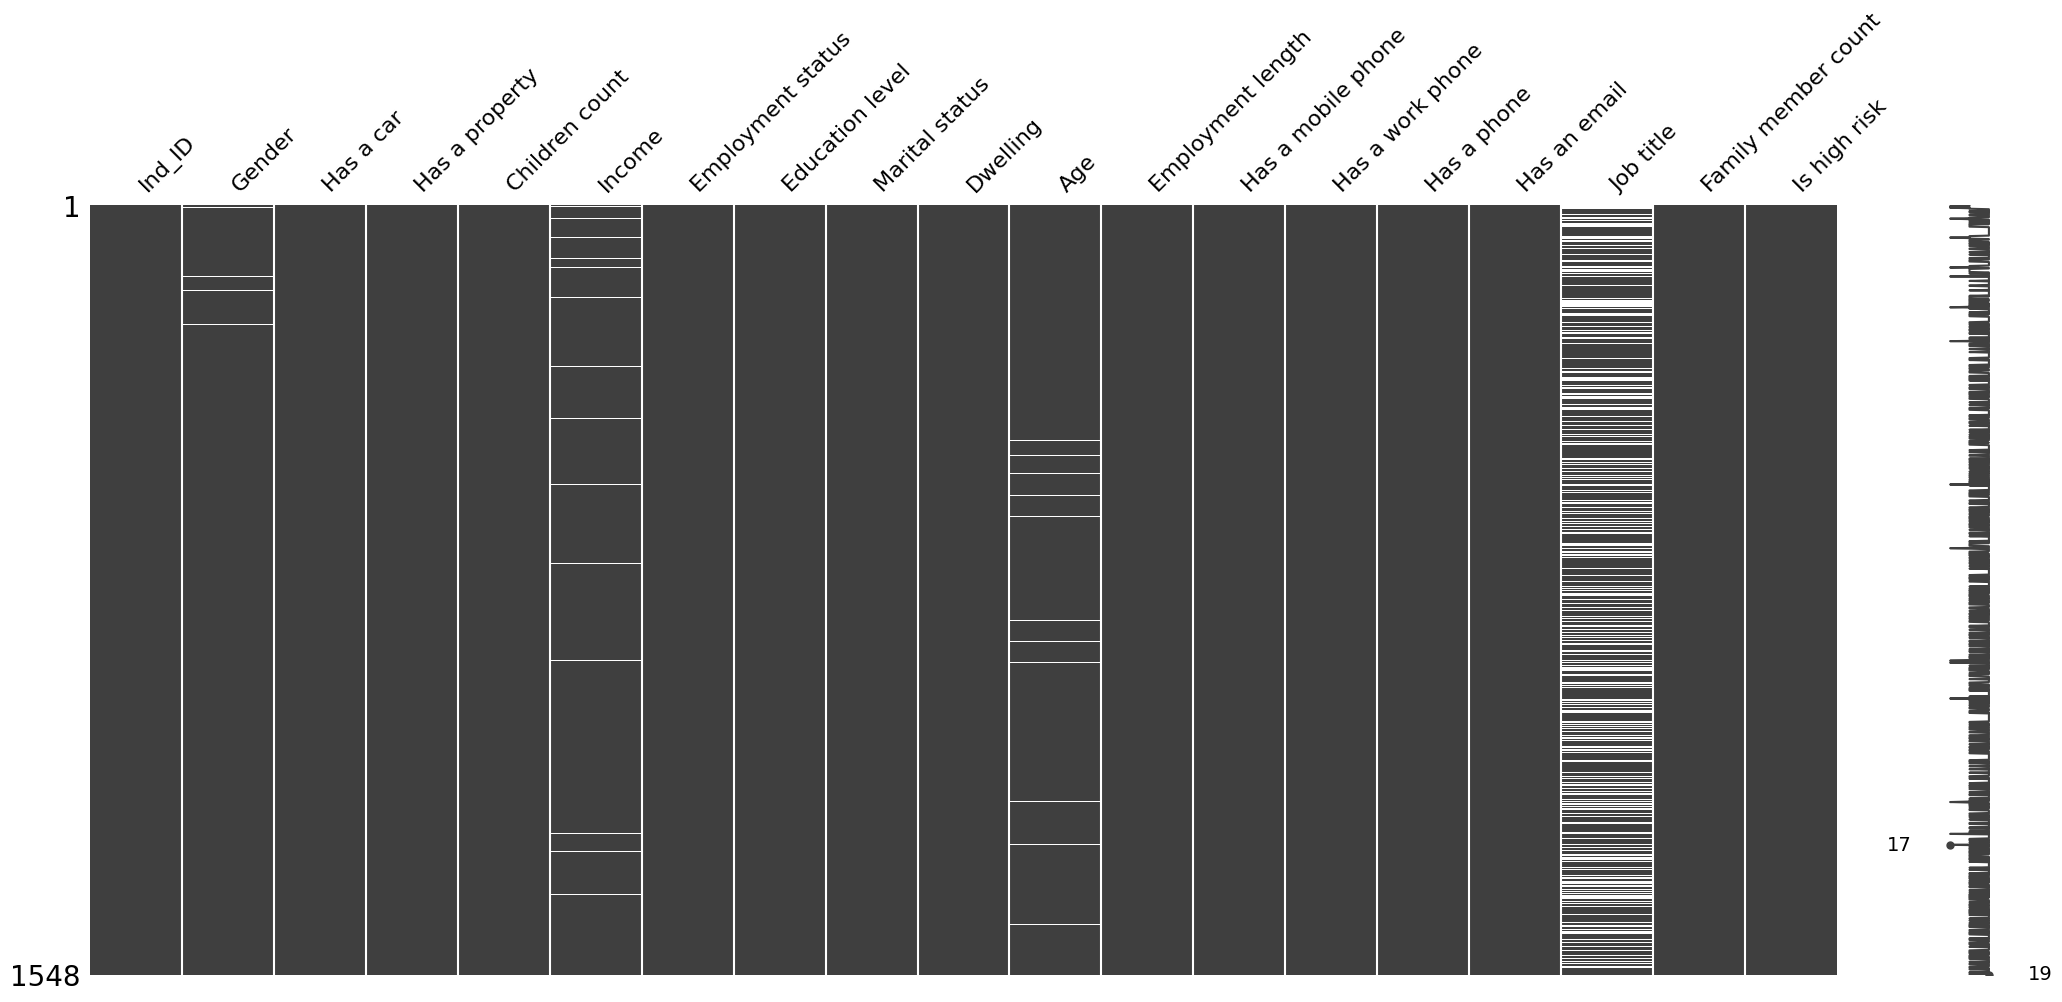

In [73]:
msno.matrix(cc_full_data_df)
plt.show()

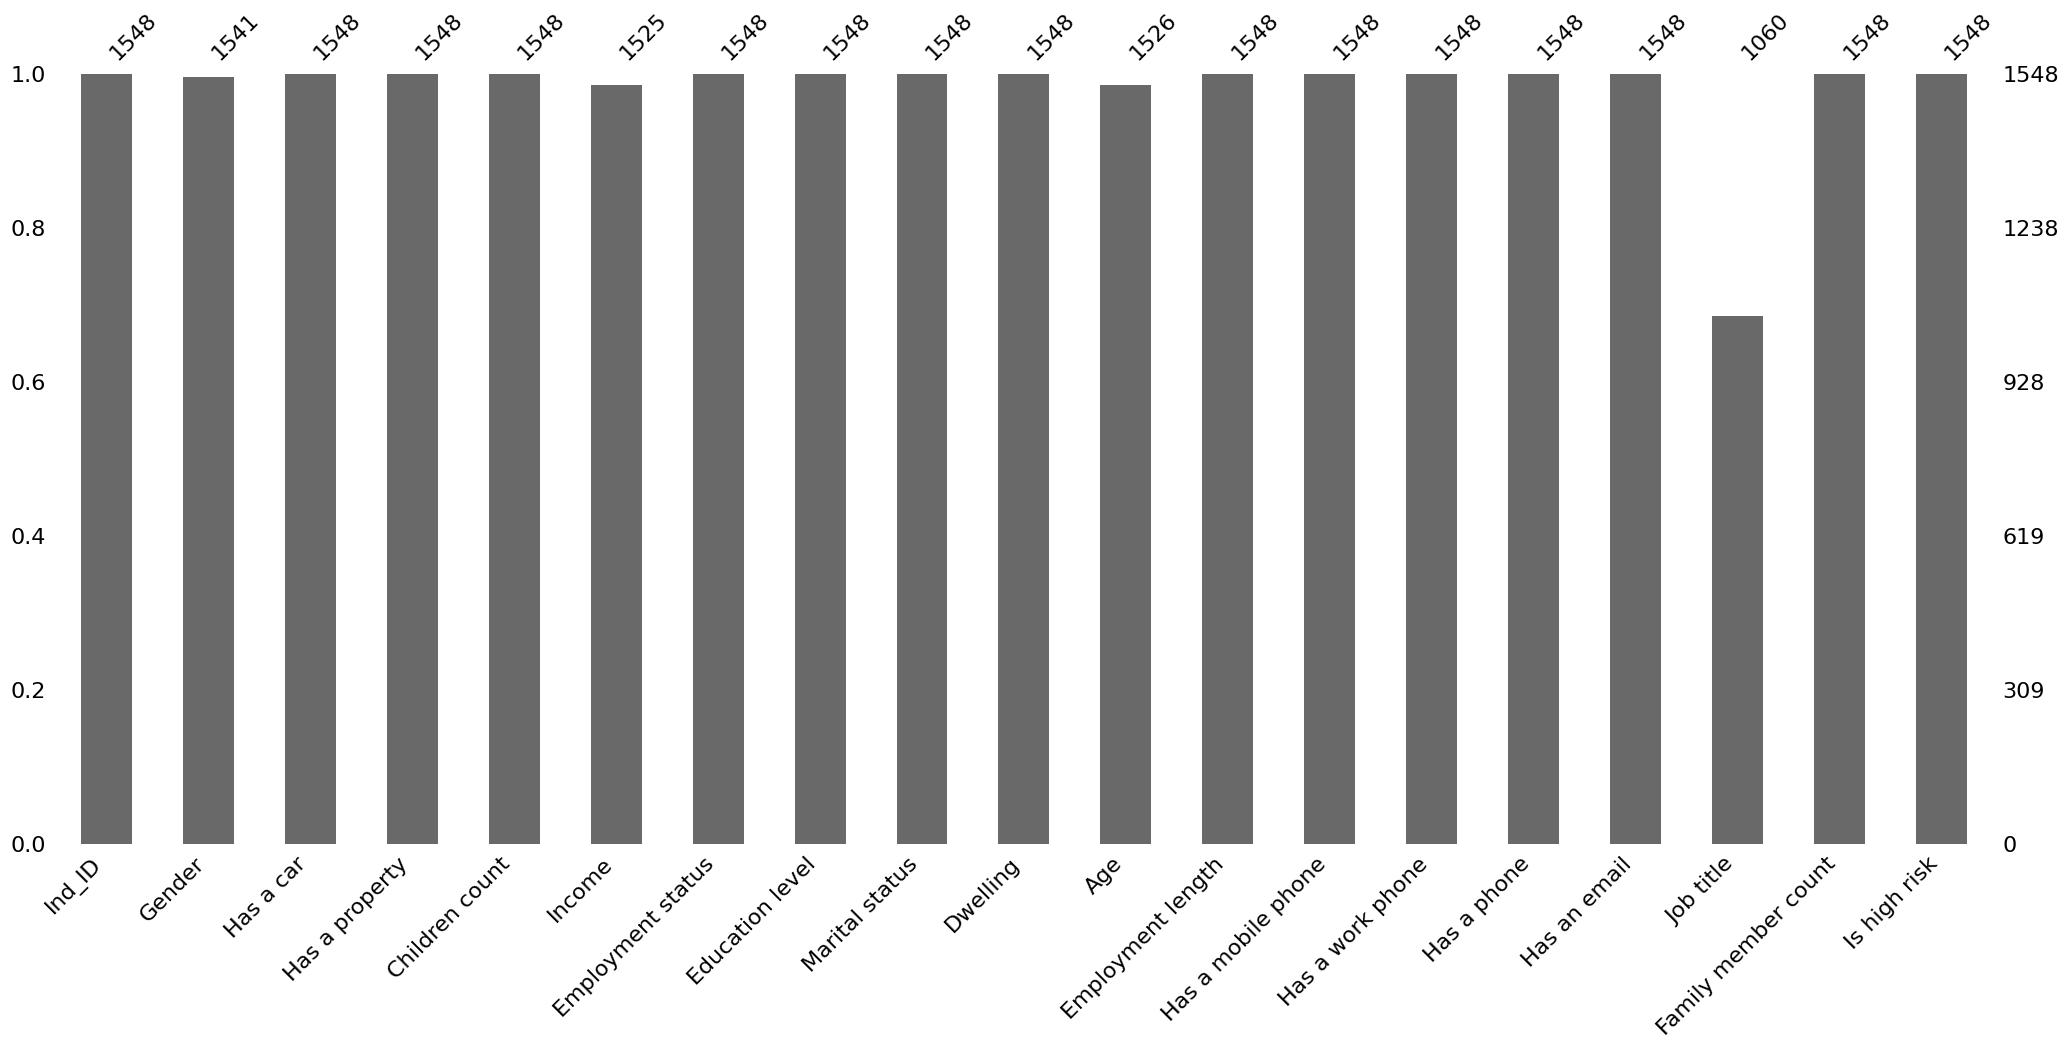

In [74]:
msno.bar(cc_full_data_df)
plt.show()

## 2.2 Functions used to explore each feature

In [75]:
#Function that will return the value count and frequency of each observation within a feature
def value_cnt_norm_cal(df,feature):
    ftr_value_cnt = df[feature].value_counts()
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return ftr_value_cnt_concat

In [76]:
def gen_info_feat(df, feature):
    match feature:
        case 'Age':
            # change the feature to be expressed in positive numbers of days
            print('Description:\n{}'.format((np.abs(df[feature])/365.25).describe()))
            print('*'*50)
            print('Object type: {}'.format(df[feature].dtype))
        case 'Employment length':
            # select only the rows where the values are negative to ignore those who have retired or unemployed
            employment_len_no_ret = cc_train_copy['Employment length'][cc_train_copy['Employment length'] < 0]
            employment_len_no_ret_yrs = np.abs(employment_len_no_ret)/365.25
            print('Description:\n{}'.format((employment_len_no_ret_yrs).describe()))
            print('*'*50)
            print('Object type: {}'.format(employment_len_no_ret.dtype))
        case _:
            print('Description:\n{}'.format(df[feature].describe()))
            print('*'*50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*'*50)
            value_cnt = value_cnt_norm_cal(df, feature)
            print('Value count:\n{}'.format(value_cnt))


In [91]:
# function to create a pie chart plot
def create_pie_plot(df,feature):
    match feature:
        case 'Dwelling' | 'Education level':
            ratio_size = value_cnt_norm_cal(df, feature)
            ratio_size_len = len(ratio_size.index)
            ratio_list = []
            for i in range(ratio_size_len):
                ratio_list.append(ratio_size.iloc[i]['Frequency (%)'])
            fig, ax = plt.subplots(figsize=(8,8))
            colors = ['blue', 'green']  # Define the colors as blue and green
            # %1.2f%% display decimals in the pie chart with 2 decimal places
            plt.pie(ratio_list, startangle=90, wedgeprops={'edgecolor' :'black'})
            plt.title('Pie chart of {}'.format(feature))
            plt.legend(loc='best',labels=ratio_size.index)
            plt.axis('equal')
            return plt.show()
        case _:
            ratio_size = value_cnt_norm_cal(df, feature)
            ratio_size_len = len(ratio_size.index)
            ratio_list = []
            for i in range(ratio_size_len):
                ratio_list.append(ratio_size.iloc[i]['Frequency (%)'])
            fig, ax = plt.subplots(figsize=(8,8))
            colors = ['blue', 'green']  # Define the colors as blue and green
            # %1.2f%% display decimals in the pie chart with 2 decimal places
            plt.pie(ratio_list, labels=ratio_size.index, autopct='%1.2f%%', startangle=90, wedgeprops={'edgecolor' :'black'})
            plt.title('Pie chart of {}'.format(feature))
            plt.legend(loc='best')
            plt.axis('equal')
            return plt.show()

In [78]:
# function to create a bar chart plot
def create_bar_plot(df,feature):
    match feature:
        case 'Marital status' | 'Dwelling' | 'Job title' | 'Employment status' | 'Education level':
            fig, ax = plt.subplots(figsize=(6,10))
            sns.barplot(x=value_cnt_norm_cal(df,feature).index,y=value_cnt_norm_cal(df,feature).values[:,0])
            ax.set_xticklabels(labels=value_cnt_norm_cal(df,feature).index,rotation=45,ha='right')
            plt.xlabel('{}'.format(feature))
            plt.ylabel('Count')
            plt.title('{} count'.format(feature))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize=(6,10))
            sns.barplot(x=value_cnt_norm_cal(df,feature).index,y=value_cnt_norm_cal(df,feature).values[:,0])
            plt.xlabel('{}'.format(feature))
            plt.ylabel('Count')
            plt.title('{} count'.format(feature))
            return plt.show()

In [121]:
# function to create a box plot
def create_box_plot(df,feature):
    match feature:
        case 'Age':
            fig, ax = plt.subplots(figsize=(2,8))
            # change the feature to be express in positive numbers days
            sns.boxplot(y=np.abs(df[feature])/365.25)
            plt.title('{} distribution(Boxplot)'.format(feature))
            return plt.show()
        case 'Children count':
            fig, ax = plt.subplots(figsize=(2,8))
            sns.boxplot(y=df[feature])
            plt.title('{} distribution(Boxplot)'.format(feature))
            plt.yticks(np.arange(0,df[feature].max(),1))
            return plt.show()
        case 'Employment length':
            fig, ax = plt.subplots(figsize=(2,8))
            employment_len_no_ret = cc_train_copy['Employment length'][cc_train_copy['Employment length'] < 0]
            # employement length in days is a negative number so we need to change it to positive and change it to days
            employment_len_no_ret_yrs = np.abs(employment_len_no_ret)/365.25
            sns.boxplot(y=employment_len_no_ret_yrs)
            plt.title('{} distribution(Boxplot)'.format(feature))
            plt.yticks(np.arange(0,employment_len_no_ret_yrs.max(),2))
            return plt.show()
        case 'Income':
            fig, ax = plt.subplots(figsize=(2,8))
            sns.boxplot(y=df[feature])
            plt.title('{} distribution(Boxplot)'.format(feature))
            # suppress scientific notation
            ax.get_yaxis().set_major_formatter(
                plt.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize=(2,8))
            sns.boxplot(y=df[feature])
            plt.title('{} distribution(Boxplot)'.format(feature))
            return plt.show()

In [124]:
# function to create a histogram plot
def create_hist_plot(df,feature, the_bins=50):
    match feature:
        case 'Age':
            fig, ax = plt.subplots(figsize=(18,10))
            # change the feature to be express in positive numbers days
            sns.histplot(np.abs(df[feature])/365.25,bins=the_bins,kde=True)
            plt.title('{} distribution'.format(feature))
            return plt.show()
        case 'Income':
            fig, ax = plt.subplots(figsize=(18,10))
            sns.histplot(df[feature],bins=the_bins,kde=True)
            # suppress scientific notation
            ax.get_xaxis().set_major_formatter(
                matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
            plt.title('{} distribution'.format(feature))
            return plt.show()
        case 'Employment length':
            employment_len_no_ret = cc_train_copy['Employment length'][cc_train_copy['Employment length'] < 0]
            # change the feature to be express in positive numbers days
            employment_len_no_ret_yrs = np.abs(employment_len_no_ret)/365.25
            fig, ax = plt.subplots(figsize=(18,10))
            sns.histplot(employment_len_no_ret_yrs,bins=the_bins,kde=True)
            plt.title('{} distribution'.format(feature))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize=(18,10))
            sns.histplot(df[feature],bins=the_bins,kde=True)
            plt.title('{} distribution'.format(feature))
            return plt.show()

In [123]:
# High risk vs low risk applicants compared on a box plot
def low_high_risk_box_plot(df,feature):
    match feature:
        case 'Age':
            print(np.abs(df.groupby('Is high risk')[feature].mean()/365.25))
            fig, ax = plt.subplots(figsize=(5,8))
            sns.boxplot(y=np.abs(df[feature])/365.25,x=df['Is high risk'])
            plt.xticks(ticks=[0,1],labels=['no','yes'])
            plt.title('High risk individuals grouped by age')
            return plt.show()
        case 'Income':
            print(np.abs(df.groupby('Is high risk')[feature].mean()))
            fig, ax = plt.subplots(figsize=(5,8))
            sns.boxplot(y=np.abs(df[feature]),x=df['Is high risk'])
            plt.xticks(ticks=[0,1],labels=['no','yes'])
            # suppress scientific notation
            ax.get_yaxis().set_major_formatter(
                matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
            plt.title('High risk individuals grouped by {}'.format(feature))
            return plt.show()
        case 'Employment length':
            #checking is an applicant is high risk or not (for those who have negative employment length aka the employed ones)
            employment_no_ret = cc_train_copy['Employment length'][cc_train_copy['Employment length'] <0]
            employment_no_ret_idx = employment_no_ret.index
            employment_len_no_ret_yrs = np.abs(employment_no_ret)/365.25
            employment_no_ret_df = cc_train_copy.iloc[employment_no_ret_idx][['Employment length','Is high risk']]
            employment_no_ret_is_high_risk = employment_no_ret_df.groupby('Is high risk')['Employment length'].mean()
            # compare the age of high risk individuals with the age of low risk individuals (those who are employed)
            print(np.abs(employment_no_ret_is_high_risk)/365.25)
            fig, ax = plt.subplots(figsize=(5,8))
            sns.boxplot(y=employment_len_no_ret_yrs,x=df['Is high risk'])
            plt.xticks(ticks=[0,1],labels=['no','yes'])
            plt.title('High vs low risk individuals grouped by {}'.format(feature))
            return plt.show()
        case _:
            print(np.abs(df.groupby('Is high risk')[feature].mean()))
            fig, ax = plt.subplots(figsize=(5,8))
            sns.boxplot(y=np.abs(df[feature]),x=df['Is high risk'])
            plt.xticks(ticks=[0,1],labels=['no','yes'])
            plt.title('High risk individuals grouped by {}'.format(feature))
            return plt.show()

In [82]:
# High risk vs low risk applicants compared on a bar plot
def low_high_risk_bar_plot(df,feature):
    is_high_risk_grp = df.groupby(feature)['Is high risk'].sum()
    is_high_risk_grp_srt = is_high_risk_grp.sort_values(ascending=False)
    print(dict(is_high_risk_grp_srt))
    fig, ax = plt.subplots(figsize=(6,10))
    sns.barplot(x=is_high_risk_grp_srt.index,y=is_high_risk_grp_srt.values)
    ax.set_xticklabels(labels=is_high_risk_grp_srt.index,rotation=45, ha='right')
    plt.ylabel('Count')
    plt.title('High risk applicants count grouped by {}'.format(feature))
    return plt.show()

In [83]:
cc_train_copy.shape

(1238, 19)

## 2.3 Univariate analysis

### 2.3.1. Gender

In [84]:
gen_info_feat(cc_train_copy,'Gender')

Description:
count     1232
unique       2
top          F
freq       778
Name: Gender, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
        Count  Frequency (%)
Gender                      
F         778      63.149351
M         454      36.850649


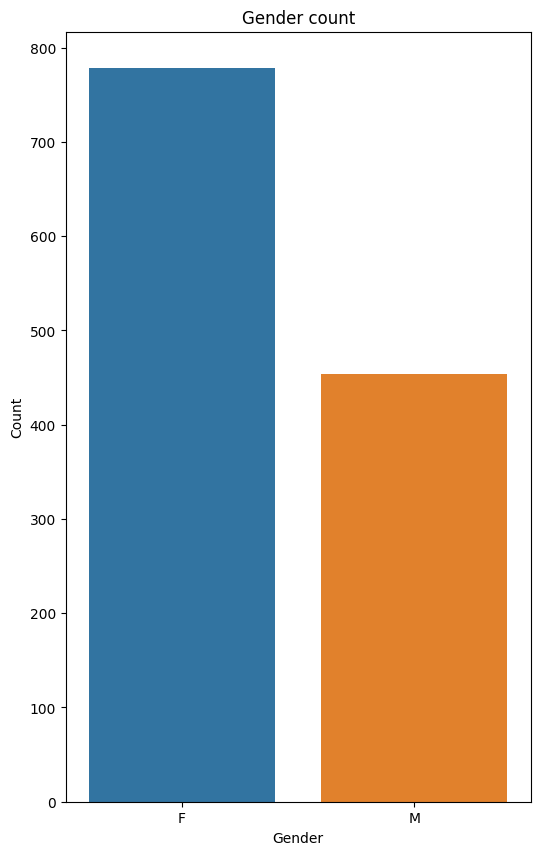

In [85]:
create_bar_plot(cc_train_copy,'Gender')

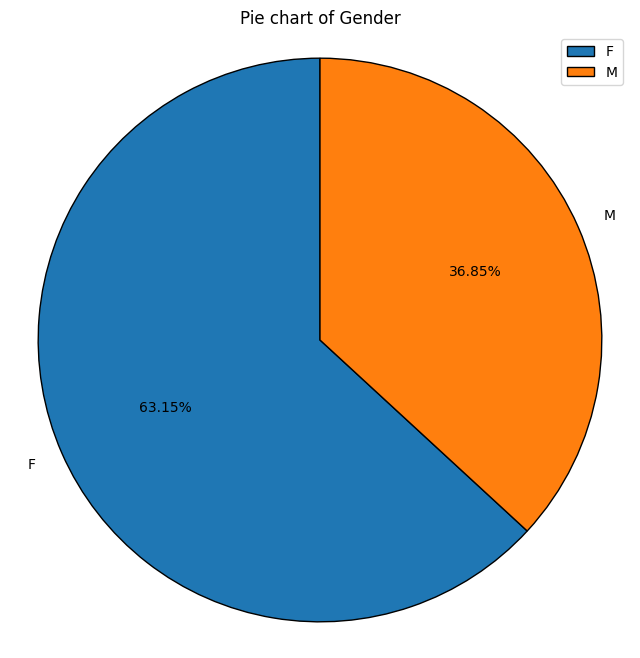

In [93]:
create_pie_plot(cc_train_copy,'Gender')

Interpretation:
- We have more female applicants than male (63.15% vs 36.85%)

### 2.3.2 Age

In [87]:
gen_info_feat(cc_train_copy,'Age')

Description:
count    1220.000000
mean       43.863197
std        11.521349
min        22.422998
25%        33.952772
50%        42.945927
75%        53.479808
max        68.298426
Name: Age, dtype: float64
**************************************************
Object type: float64


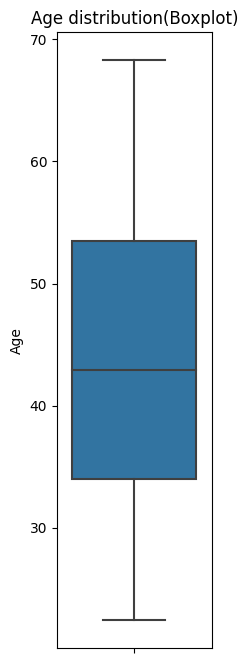

In [88]:
create_box_plot(cc_train_copy,'Age')

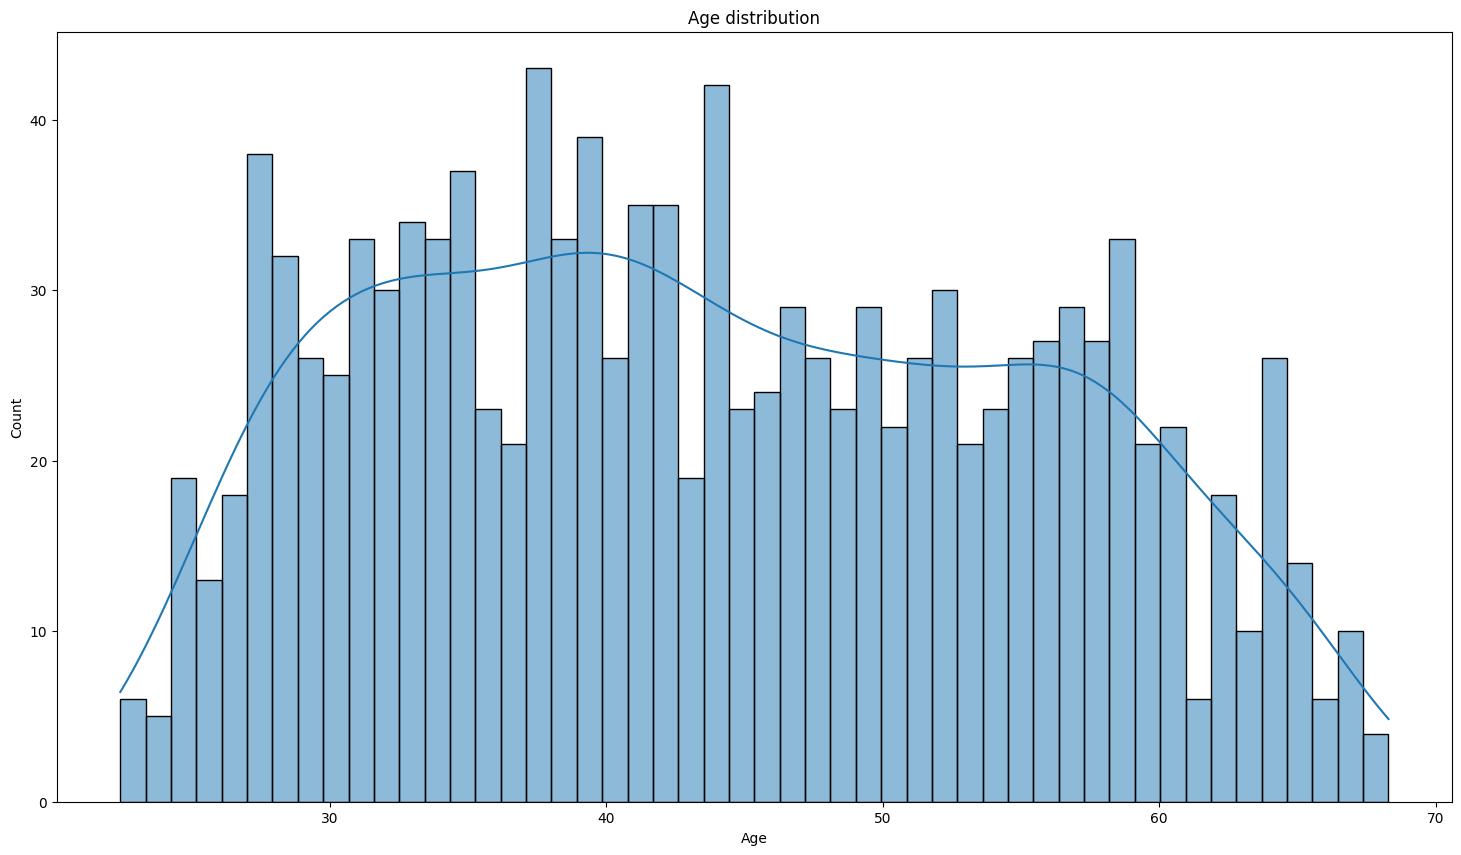

In [89]:
create_hist_plot(cc_train_copy,'Age')

* bivariate analysis with target variable

Is high risk
0    43.733156
1    44.834892
Name: Age, dtype: float64


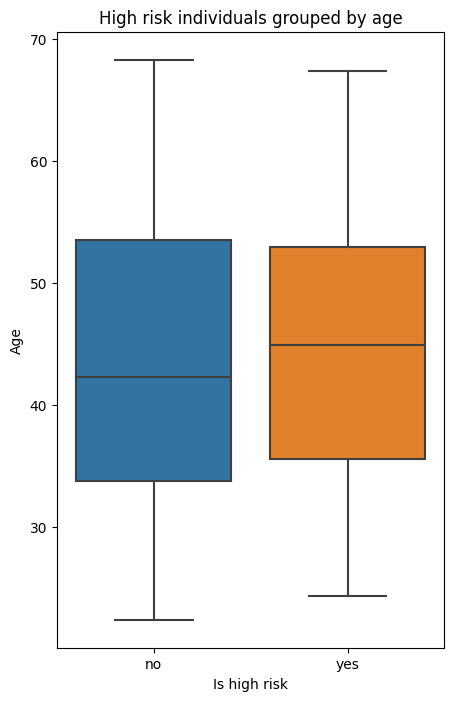

In [90]:
low_high_risk_box_plot(cc_train_copy,'Age')

Interpretation:
- The youngest applicant is 34 years old while the oldest is 55 years old. with the average of 43.86(outliers insensitive)
- Age feature is not normally distributed, it is slightly positively skew
- There is no difference between the average age of high and low risk applicants

### 2.3.3 Marital status

In [94]:
gen_info_feat(cc_train_copy,'Marital status')

Description:
count        1238
unique          5
top       Married
freq          848
Name: Marital status, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                      Count  Frequency (%)
Marital status                            
Married                 848      68.497577
Single / not married    183      14.781906
Civil marriage           76       6.138934
Separated                71       5.735057
Widow                    60       4.846527


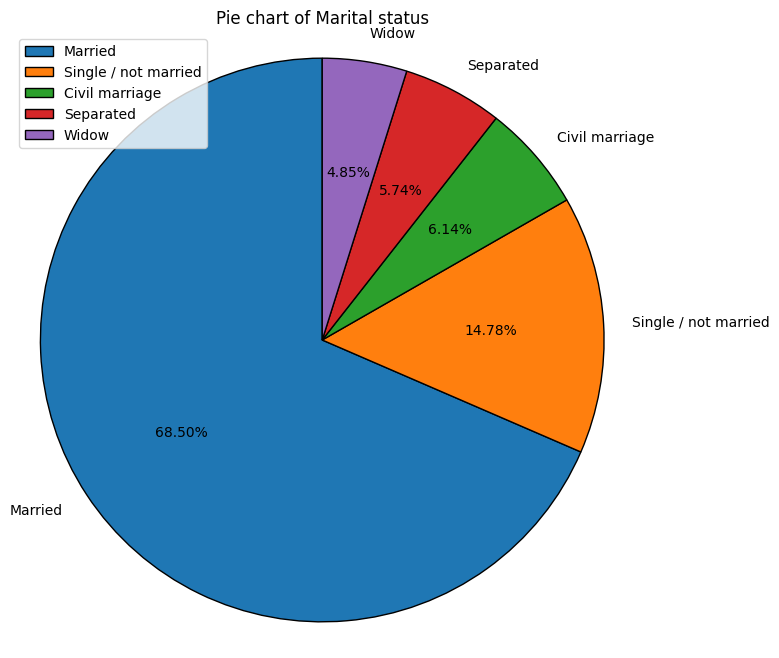

In [95]:
create_pie_plot(cc_train_copy,'Marital status')

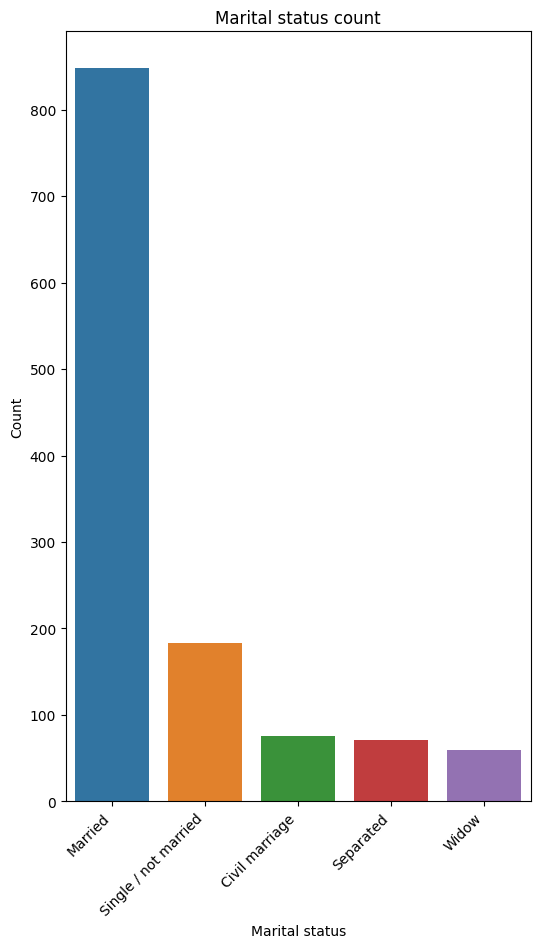

In [96]:
create_bar_plot(cc_train_copy,'Marital status')

Interpretation:
- Most applicants are married
- Even though we have a higher number of applicants who are separated than those who are widow, it seems like widow applicants are high risk than those who are separated.

### 2.3.4 Family member count

In [97]:
gen_info_feat(cc_train_copy,'Family member count')

Description:
count    1238.000000
mean        2.172052
std         0.968524
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: Family member count, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
                     Count  Frequency (%)
Family member count                      
2                      642      51.857835
1                      264      21.324717
3                      214      17.285945
4                      102       8.239095
5                       14       1.130856
15                       1       0.080775
6                        1       0.080775


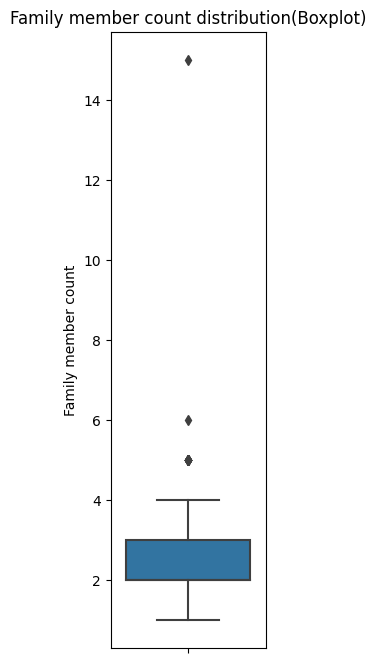

In [98]:
create_box_plot(cc_train_copy,'Family member count')

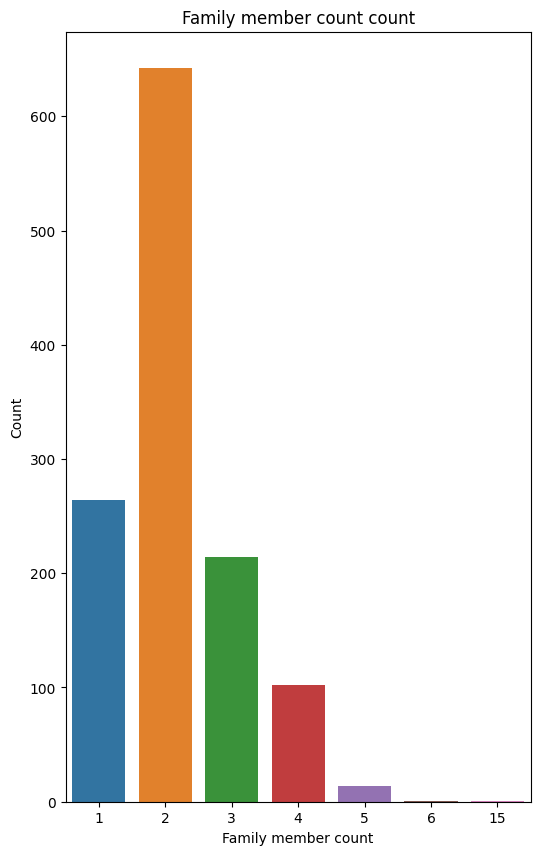

In [99]:
create_bar_plot(cc_train_copy,'Family member count')

Interpretation:
-   Most applicants are two in their household, this is also confirmed with the fact that most don’t have a child (more on this in a bit)

### 2.3.5 Children count

In [100]:
gen_info_feat(cc_train_copy,'Children count')

Description:
count    1238.000000
mean        0.421648
std         0.804142
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        14.000000
Name: Children count, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
                Count  Frequency (%)
Children count                      
0                 869      70.193861
1                 245      19.789984
2                 107       8.642973
3                  15       1.211632
14                  1       0.080775
4                   1       0.080775


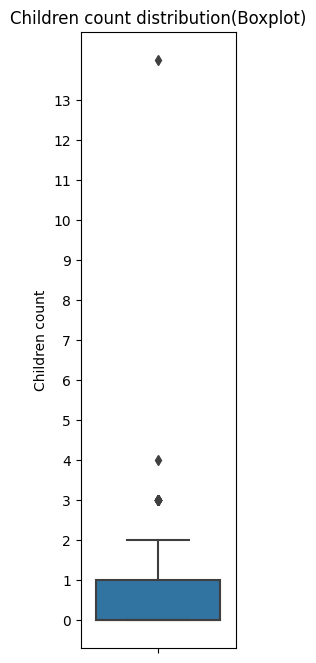

In [101]:
create_box_plot(cc_train_copy,'Children count')

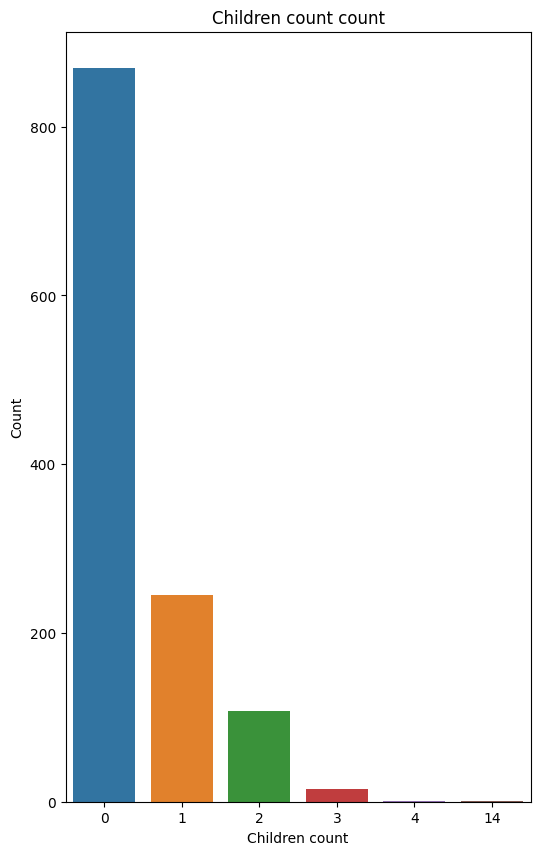

In [102]:
create_bar_plot(cc_train_copy,'Children count')

Interpretation:
-	As previously discussed most applicant don’t have a child
-	Also here we have some outliers, probably the same from the family member count

### 2.3.6 Dwelling type

In [103]:
gen_info_feat(cc_train_copy,'Dwelling')

Description:
count                  1238
unique                    6
top       House / apartment
freq                   1107
Name: Dwelling, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                     Count  Frequency (%)
Dwelling                                 
House / apartment     1107      89.418417
With parents            58       4.684976
Municipal apartment     45       3.634895
Rented apartment        18       1.453958
Office apartment         6       0.484653
Co-op apartment          4       0.323102


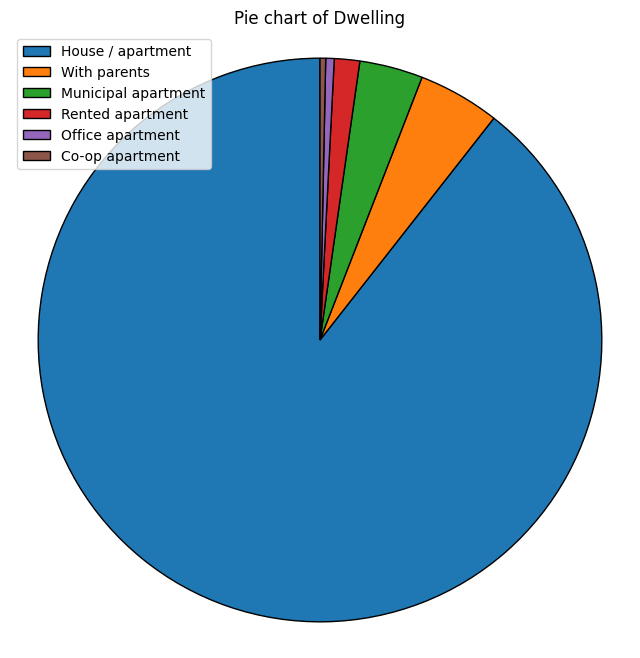

In [104]:
create_pie_plot(cc_train_copy,'Dwelling')

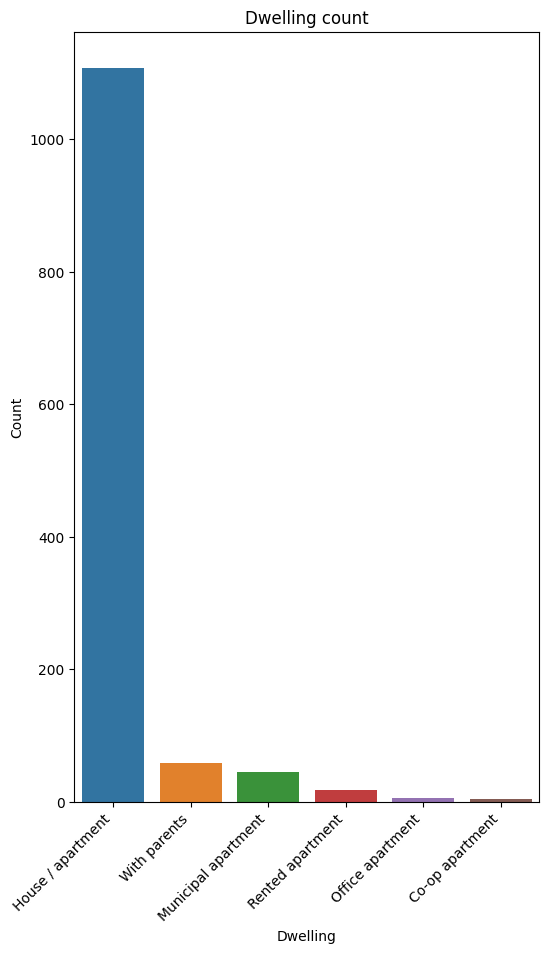

In [105]:
create_bar_plot(cc_train_copy,'Dwelling')

Interpretation:
- Almost every applicants live in house or apartment

### 2.3.7 Income

In [106]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
gen_info_feat(cc_train_copy,'Income')

Description:
count      1222.00
mean     194770.84
std      117728.60
min       33750.00
25%      126000.00
50%      172125.00
75%      225000.00
max     1575000.00
Name: Income, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
           Count  Frequency (%)
Income                         
135000.00    135          11.05
112500.00    114           9.33
180000.00    107           8.76
157500.00     95           7.77
225000.00     91           7.45
...          ...            ...
787500.00      1           0.08
175500.00      1           0.08
95850.00       1           0.08
215100.00      1           0.08
382500.00      1           0.08

[104 rows x 2 columns]


AttributeError: module 'matplotlib.pyplot' has no attribute 'ticker'

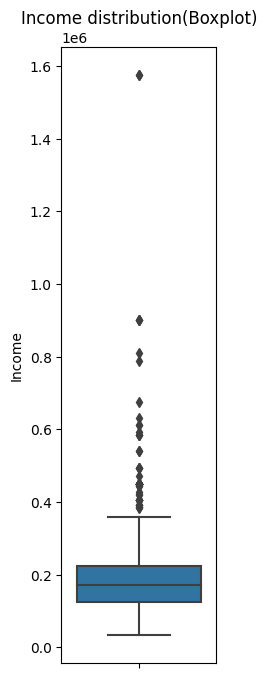

In [125]:
create_box_plot(cc_train_copy,'Income')

NameError: name 'matplotlib' is not defined

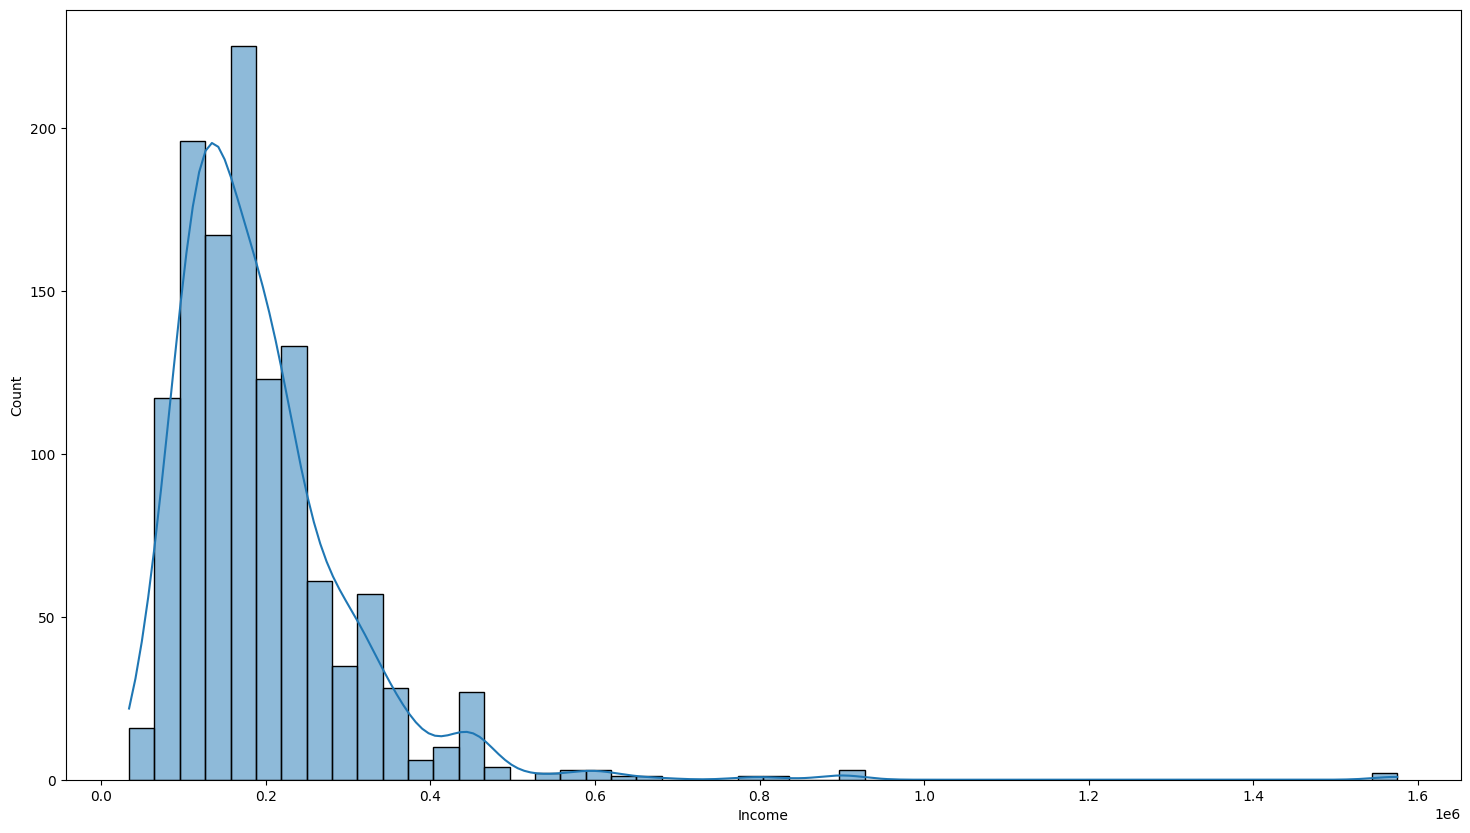

In [544]:
create_hist_plot(cc_train_copy,'Income')

Is high risk
0   193525.39
1   204396.43
Name: Income, dtype: float64


NameError: name 'matplotlib' is not defined

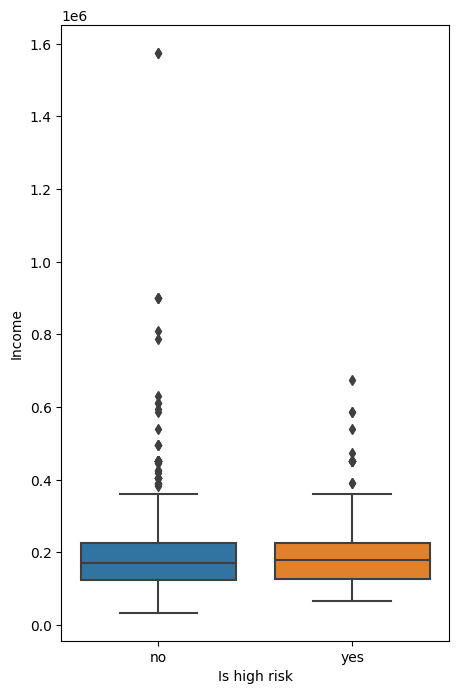

In [543]:
low_high_risk_box_plot(cc_train_copy,'Income')

Interpretation:
-	The average income is 194770 but this amount accounts for outliers. 
-	This feature is positively skewed
-	High risk and low risk applicants have roughly similar income

### 2.3.8 Job title

In [126]:
gen_info_feat(cc_train_copy,'Job title')

Description:
count          838
unique          18
top       Laborers
freq           210
Name: Job title, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                       Count  Frequency (%)
Job title                                  
Laborers                 210          25.06
Core staff               141          16.83
Managers                 112          13.37
Sales staff               91          10.86
Drivers                   70           8.35
High skill tech staff     51           6.09
Medicine staff            39           4.65
Accountants               37           4.42
Security staff            18           2.15
Cooking staff             17           2.03
Private service staff     15           1.79
Cleaning staff            14           1.67
Secretaries                7           0.84
Low-skill Laborers         5           0.60
Waiters/barmen staff       5           0.

In [127]:
job_title_nan_count = cc_train_copy['Job title'].isna().sum()
job_title_nan_count

400

In [128]:
rows_total_count = cc_train_copy.shape[0]

In [129]:
print('The percentage of missing rows is {:.2f} %'.format(job_title_nan_count * 100 / rows_total_count))

The percentage of missing rows is 32.31 %


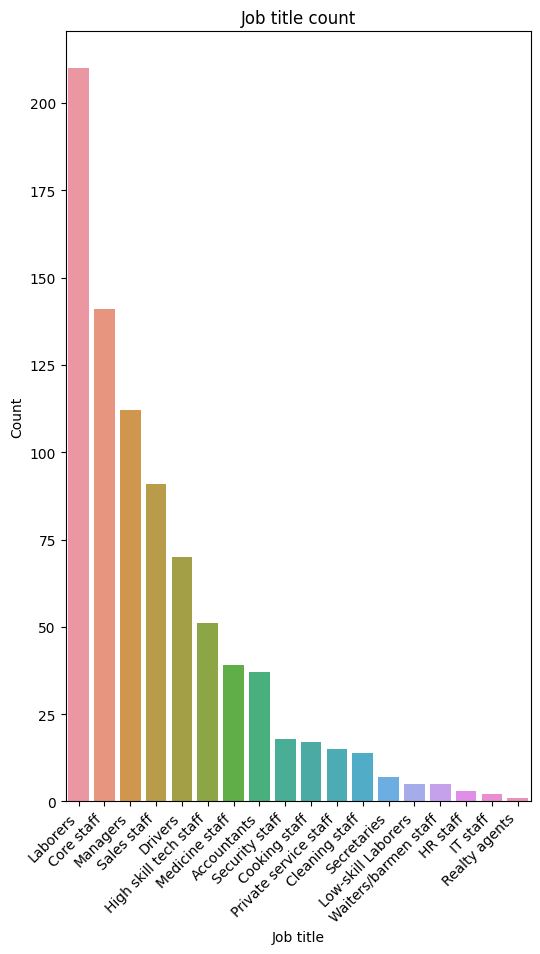

In [130]:
create_bar_plot(cc_train_copy,'Job title')

Interpretation:
-	The most prolific Job title is laborers by far
-	We also have missing data

### 2.3.9 Employment status

In [131]:
gen_info_feat(cc_train_copy,'Employment status')

Description:
count        1238
unique          4
top       Working
freq          634
Name: Employment status, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                      Count  Frequency (%)
Employment status                         
Working                 634          51.21
Commercial associate    292          23.59
Pensioner               216          17.45
State servant            96           7.75


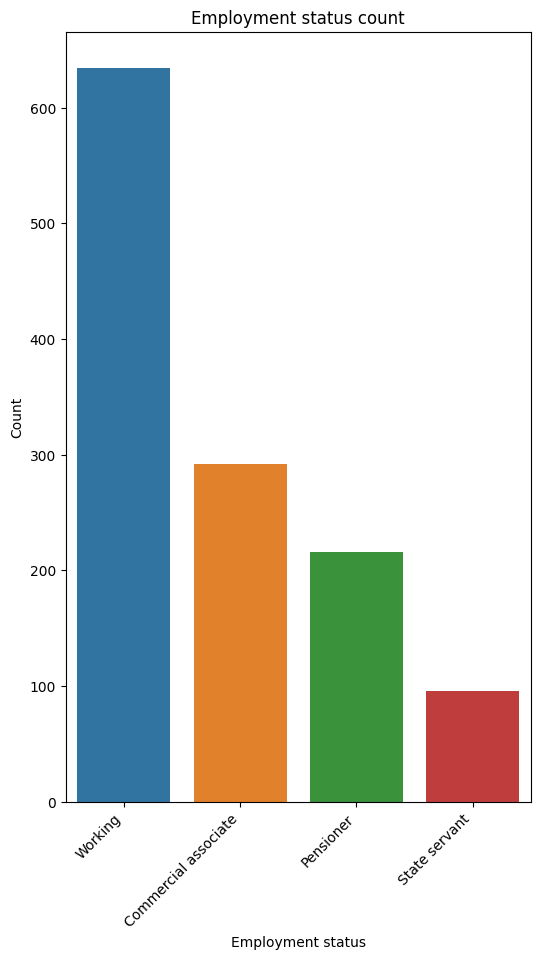

In [132]:
create_bar_plot(cc_train_copy,'Employment status')

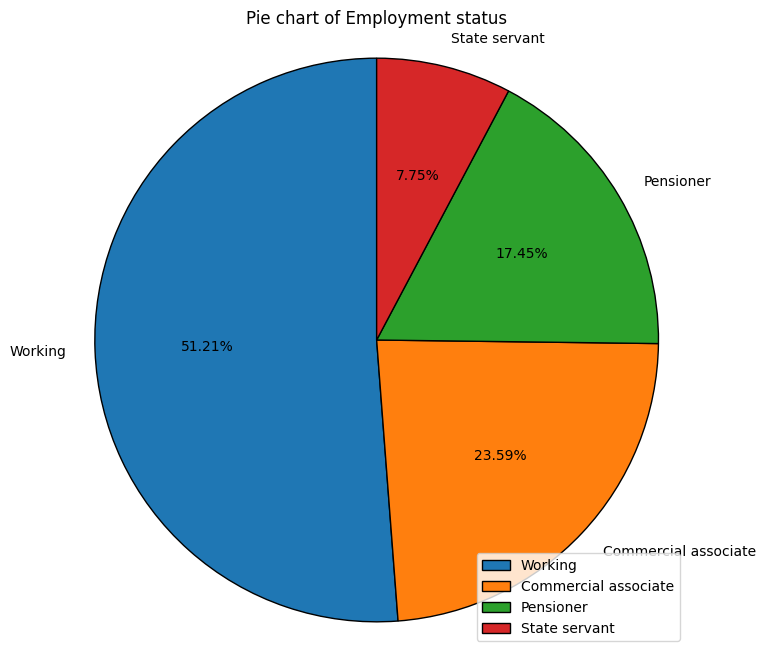

In [133]:
create_pie_plot(cc_train_copy,'Employment status')

Interpretation:
- Most applicants are employed

### 2.3.10 Education level

In [134]:
gen_info_feat(cc_train_copy,'Education level')

Description:
count                              1238
unique                                5
top       Secondary / secondary special
freq                                820
Name: Education level, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                               Count  Frequency (%)
Education level                                    
Secondary / secondary special    820          66.24
Higher education                 349          28.19
Incomplete higher                 54           4.36
Lower secondary                   14           1.13
Academic degree                    1           0.08


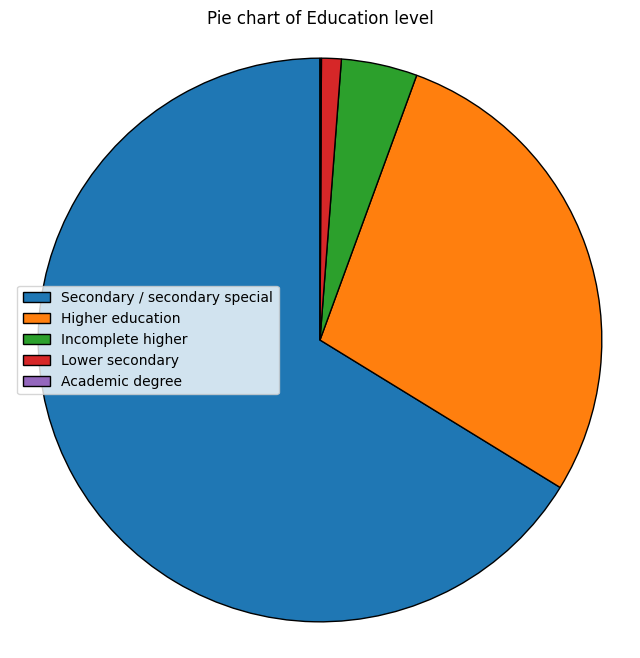

In [135]:
create_pie_plot(cc_train_copy,'Education level')

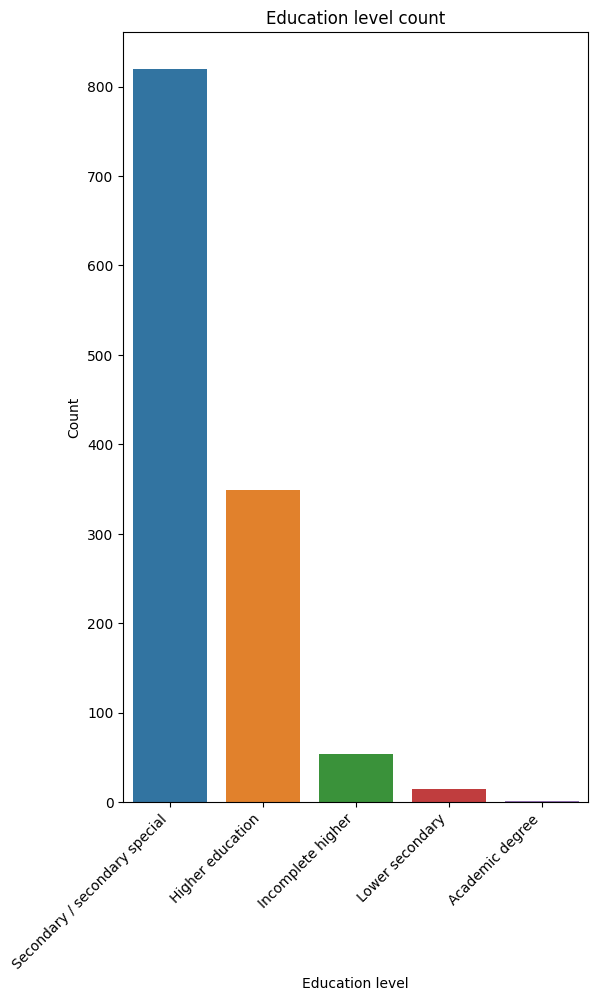

In [136]:
create_bar_plot(cc_train_copy,'Education level')

Interpretation:
-	The majority of applicants have completed their secondary degree, ¼ completed their higher education

### 2.3.11 Employment length

In [137]:
gen_info_feat(cc_train_copy,'Employment length')

Description:
count   1030.00
mean       7.32
std        6.54
min        0.20
25%        2.57
50%        5.30
75%        9.60
max       40.76
Name: Employment length, dtype: float64
**************************************************
Object type: int64


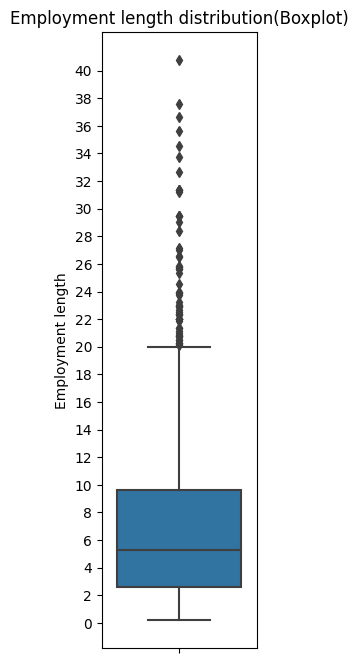

In [138]:
create_box_plot(cc_train_copy,'Employment length')

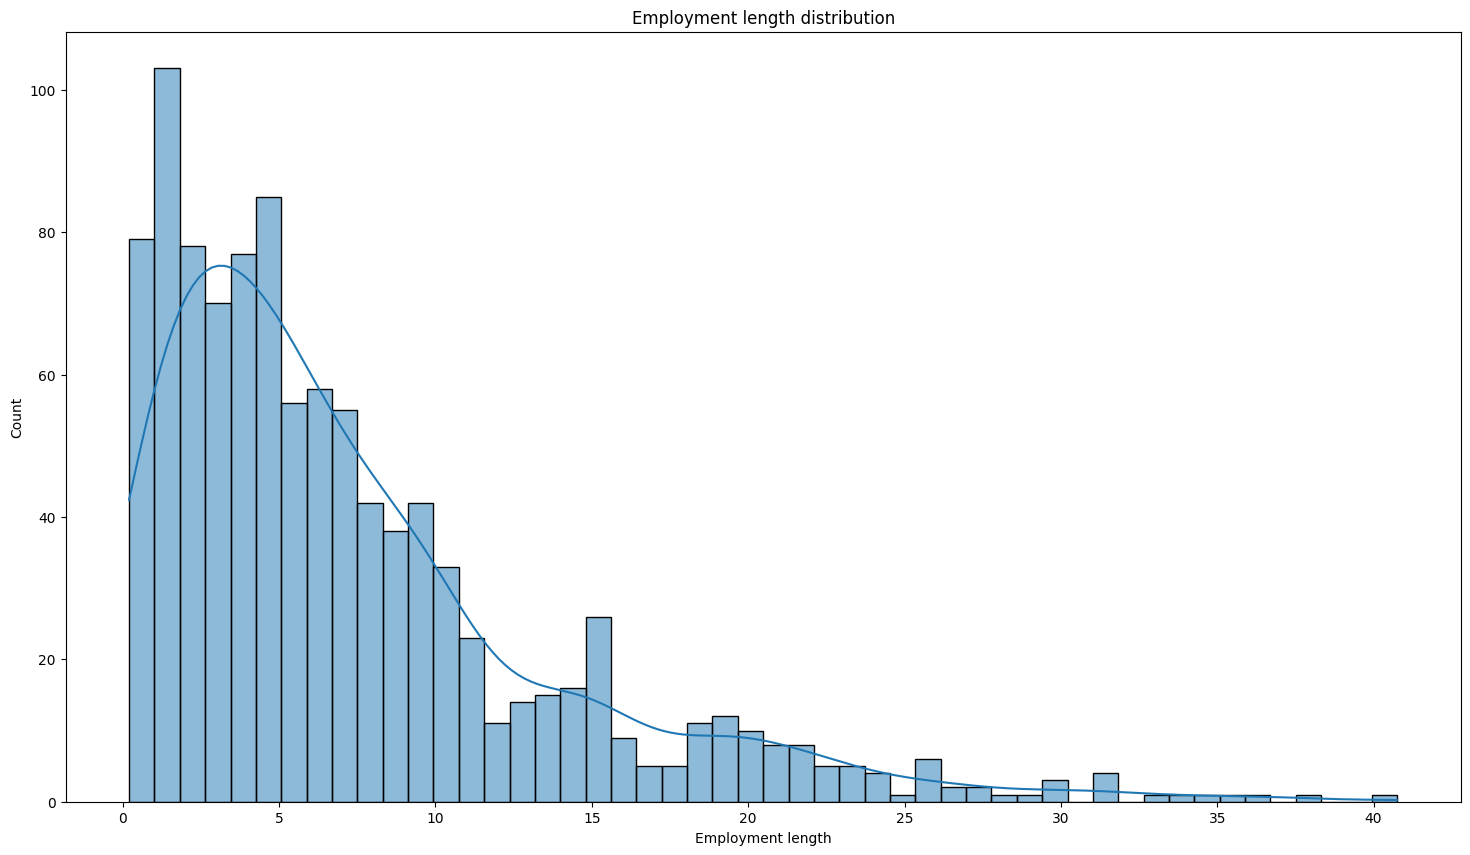

In [139]:
create_hist_plot(cc_train_copy,'Employment length')

* bivariate analysis with target variable

Is high risk
0   7.58
1   5.27
Name: Employment length, dtype: float64


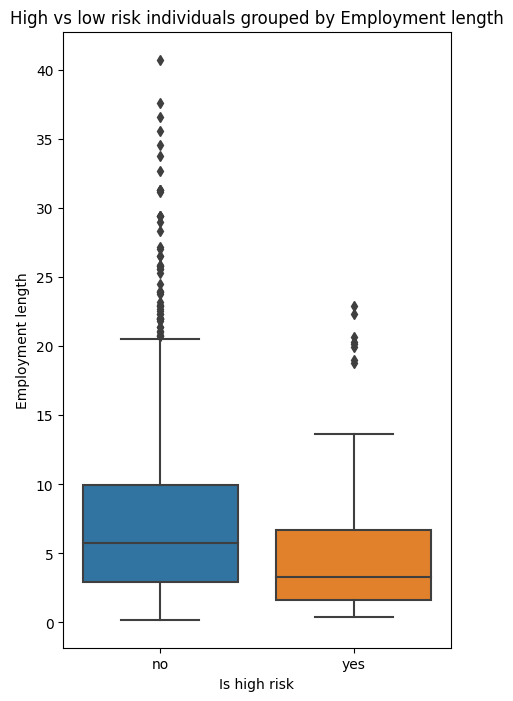

In [140]:
# distribution of employment length for high vs low risk applicants
# Here 0 means No and 1 means Yes
low_high_risk_box_plot(cc_train_copy,'Employment length')

Interpretation:
-	Most of applicant have been working for 4 to 7 years on average
-	We have quite a number of outliers who have been working for more than 20 years+
-	The employment length is positively skewed
-	Those who are high risk have a low employment length of 4 versus 7 years for the low risk


### 2.3.12 Has a car

In [141]:
gen_info_feat(cc_train_copy,'Has a car')

Description:
count     1238
unique       2
top          N
freq       750
Name: Has a car, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
           Count  Frequency (%)
Has a car                      
N            750          60.58
Y            488          39.42


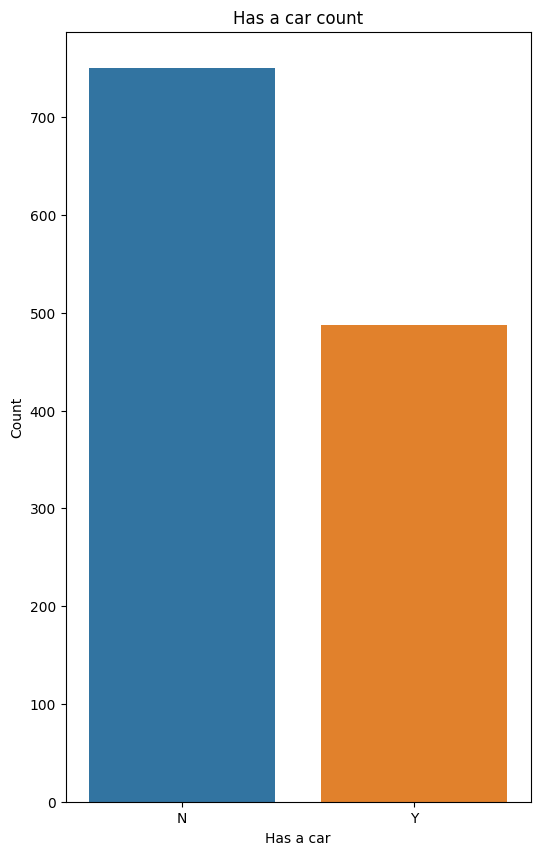

In [142]:
create_bar_plot(cc_train_copy,'Has a car')

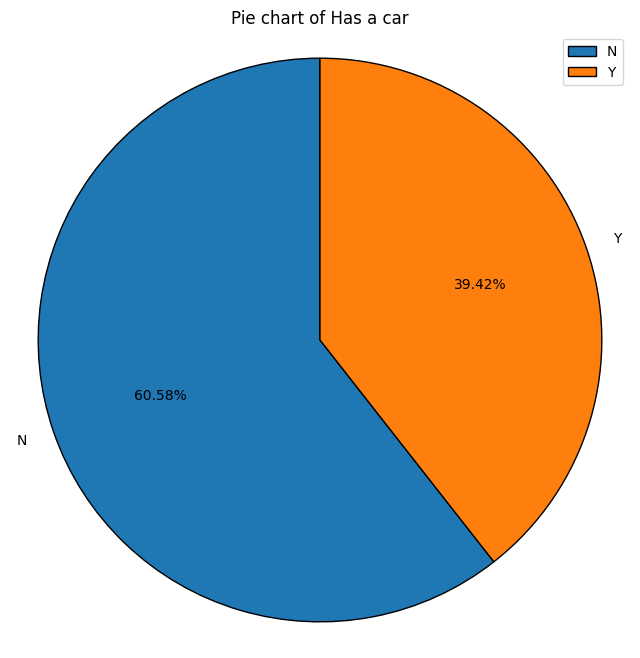

In [143]:
create_pie_plot(cc_train_copy,'Has a car')

Interpretation:
- Most applicant don’t own a car

### 2.3.13 Has a property

In [144]:
gen_info_feat(cc_train_copy,'Has a property')

Description:
count     1238
unique       2
top          Y
freq       805
Name: Has a property, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                Count  Frequency (%)
Has a property                      
Y                 805          65.02
N                 433          34.98


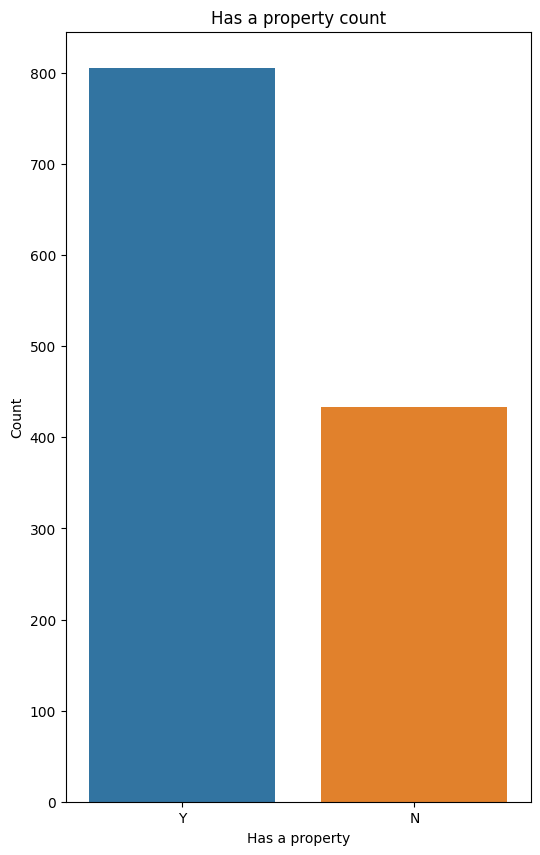

In [145]:
create_bar_plot(cc_train_copy,'Has a property')

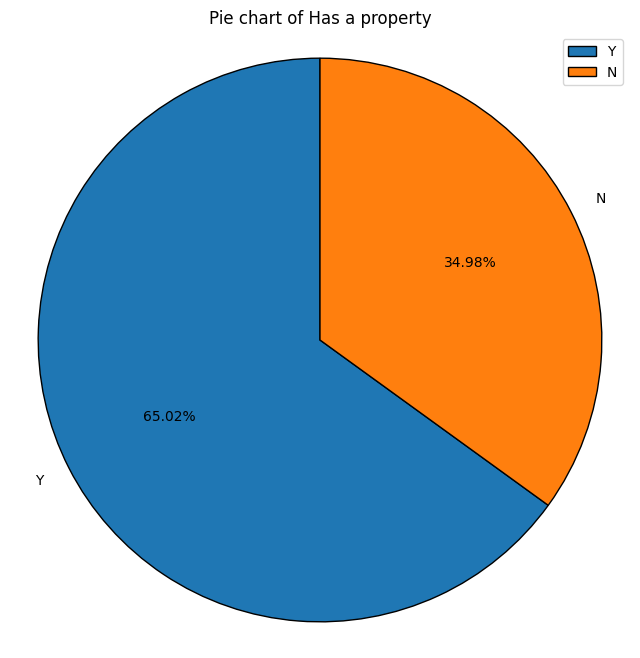

In [146]:
create_pie_plot(cc_train_copy,'Has a property')

Interpretation:
- Most applicants own a property

### 2.3.14 Has a work phone

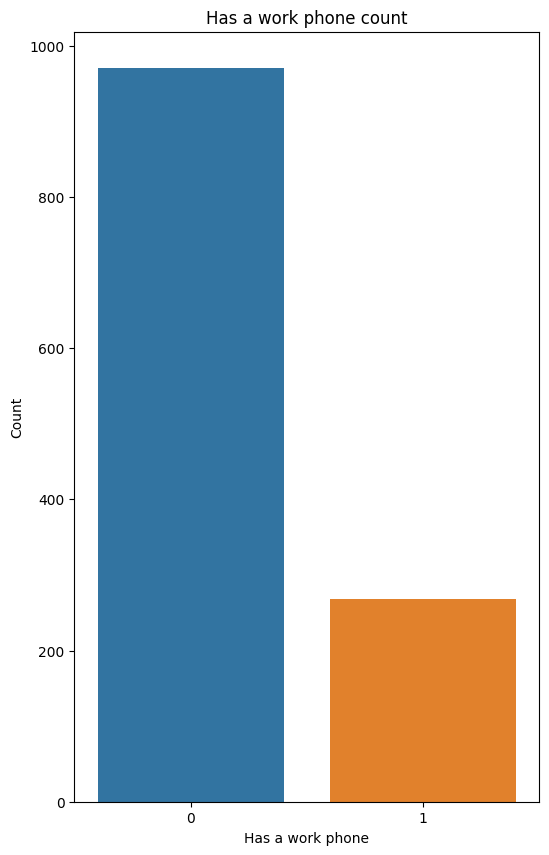

In [147]:
create_bar_plot(cc_train_copy,'Has a work phone')

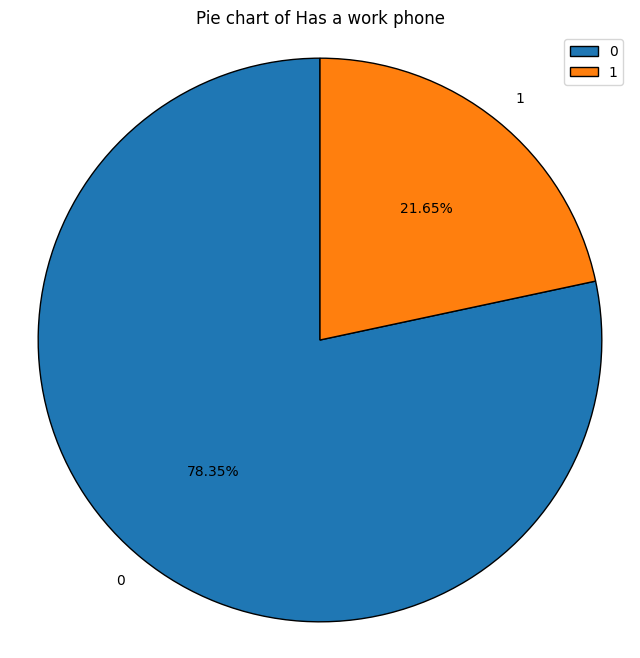

In [148]:
create_pie_plot(cc_train_copy,'Has a work phone')

Interpretation:
- More than ¾ of applicants don’t have a work phone

Note: Here 0 is no and 1 is yes

### 2.3.15 Has a mobile phone

In [149]:
gen_info_feat(cc_train_copy,'Has a mobile phone')

Description:
count   1238.00
mean       1.00
std        0.00
min        1.00
25%        1.00
50%        1.00
75%        1.00
max        1.00
Name: Has a mobile phone, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
                    Count  Frequency (%)
Has a mobile phone                      
1                    1238         100.00


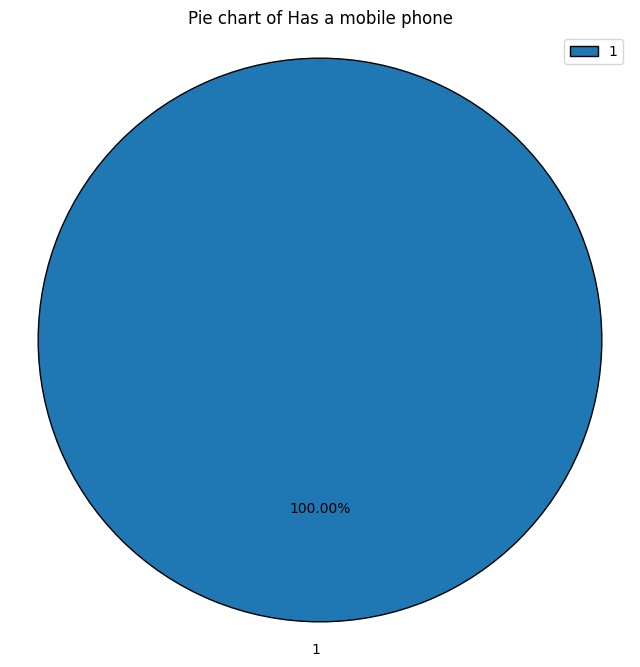

In [150]:
create_pie_plot(cc_train_copy,'Has a mobile phone')

Interpretation:
- All the applicants without exception have a mobile phone

Note: Here 0 is no and 1 is yes

### 2.3.16 Has a phone

In [152]:
gen_info_feat(cc_train_copy,'Has a phone')

Description:
count   1238.00
mean       0.31
std        0.46
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        1.00
Name: Has a phone, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
             Count  Frequency (%)
Has a phone                      
0              859          69.39
1              379          30.61


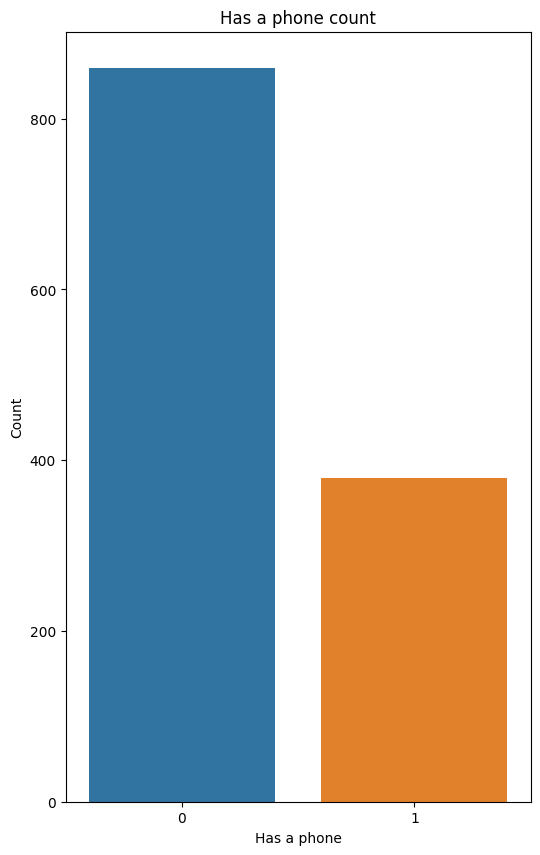

In [153]:
create_bar_plot(cc_train_copy,'Has a phone')

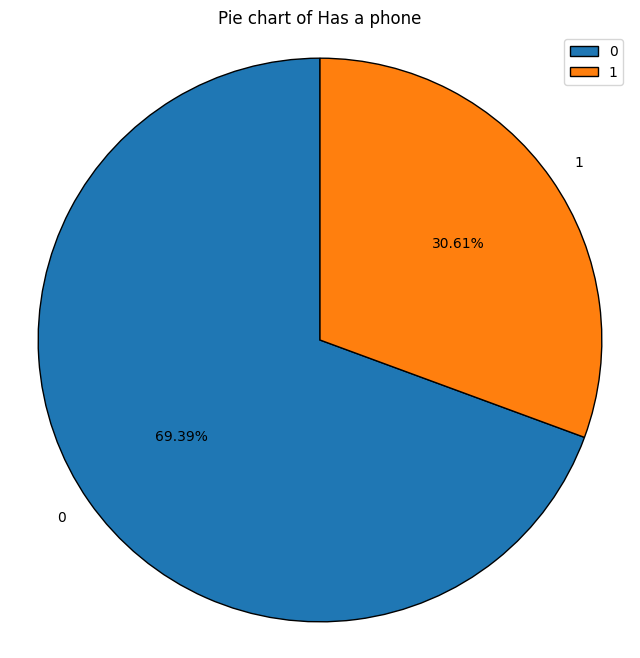

In [154]:
create_pie_plot(cc_train_copy,'Has a phone')

Interpretation:
- Most applicants don’t have a phone (probably a home phone)

Note: Here 0 is no and 1 is yes

### 2.3.17 Has an email

In [155]:
gen_info_feat(cc_train_copy,'Has an email')

Description:
count   1238.00
mean       0.09
std        0.29
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: Has an email, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
              Count  Frequency (%)
Has an email                      
0              1123          90.71
1               115           9.29


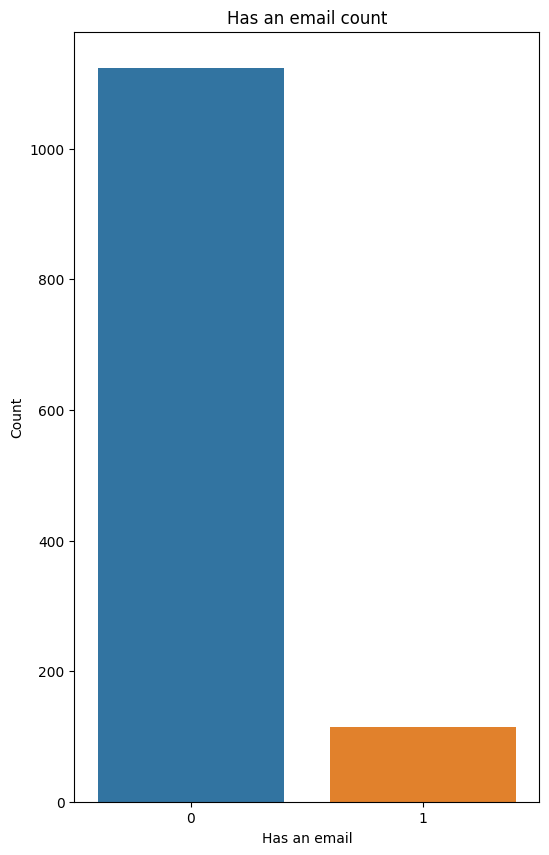

In [156]:
create_bar_plot(cc_train_copy,'Has an email')

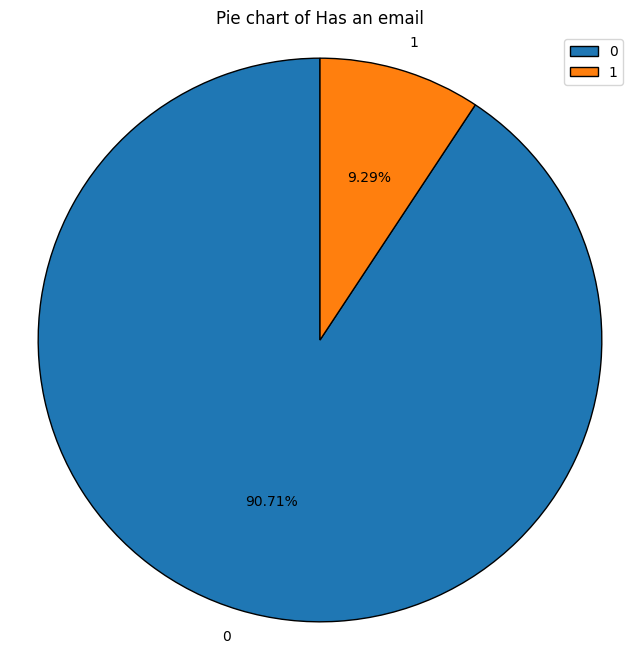

In [157]:
create_pie_plot(cc_train_copy,'Has an email')

Interpretation:
- More than 90% of applicants don’t have an email

Note: Here 0 is no and 1 is yes

### 2.3.18 Is high risk (target variable)

In [158]:
gen_info_feat(cc_train_copy,'Is high risk')

Description:
count   1238.00
mean       0.12
std        0.32
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: Is high risk, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
              Count  Frequency (%)
Is high risk                      
0              1093          88.29
1               145          11.71


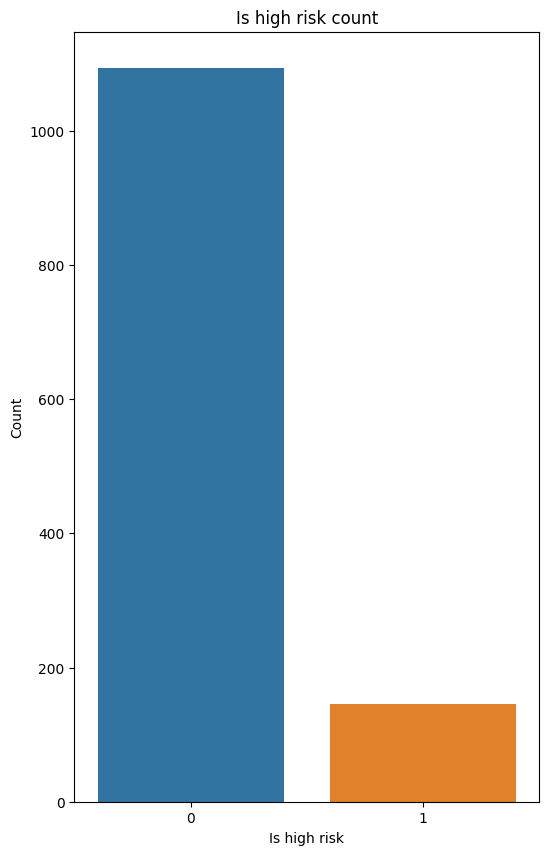

In [159]:
create_bar_plot(cc_train_copy,'Is high risk')

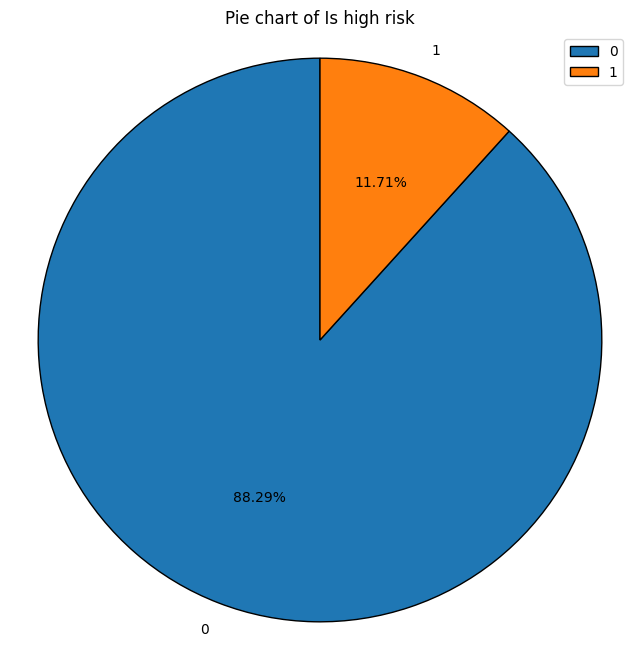

In [160]:
create_pie_plot(cc_train_copy,'Is high risk')

Interpretation:
- A vast majority of applicants are low risk applicants.
- We have a very imbalance data.

Note: Here 0 is no and 1 is yes


## 2.4 Bivariate analysis

### 2.4.1 Numerical vs numerical features (Correlation & scatter plots)

#### 2.4.1.1 Scatter plots

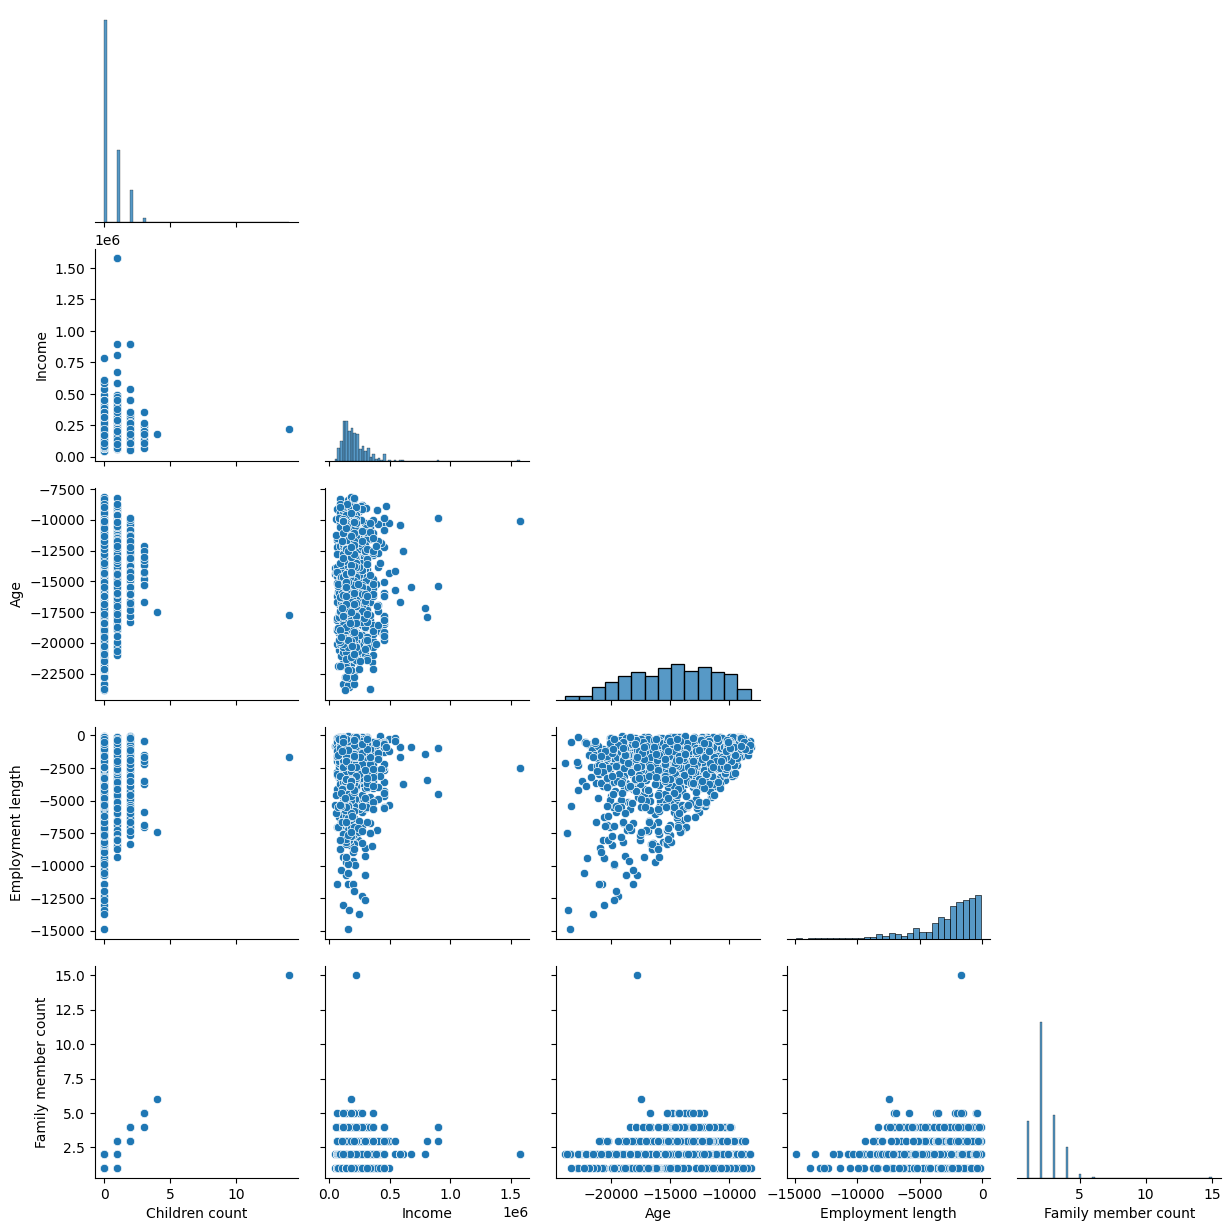

In [161]:
sns.pairplot(cc_train_copy[cc_train_copy['Employment length'] < 0].drop(['Ind_ID','Has a mobile phone', 'Has a work phone', 'Has a phone', 'Has an email','Is high risk'],axis=1),corner=True)
plt.show()

Interpretation:
- We can see a positive linear correlation between the family member and the children count. This makes sense, the more the children someone have, the larger the family member count. This is a multicollinearity problem. Meaning that the features are highly correlated. We will need to drop one of them.
- Another interesting trend is the Employment length and age. This also makes sense, the longer the employee has been working, the older they are.

##### 2.4.1.1.1 Family member count vs children count (numerical vs numerical feature comparison)

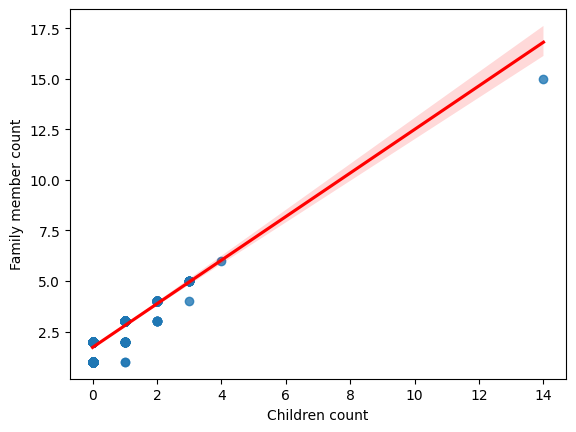

In [162]:
sns.regplot(x='Children count',y='Family member count',data=cc_train_copy,line_kws={'color': 'red'})
plt.show()

Interpretation:
- The more children a person has, the larger the family member count.

##### 2.4.1.1.2 Employment length vs age (numerical vs numerical feature comparison)

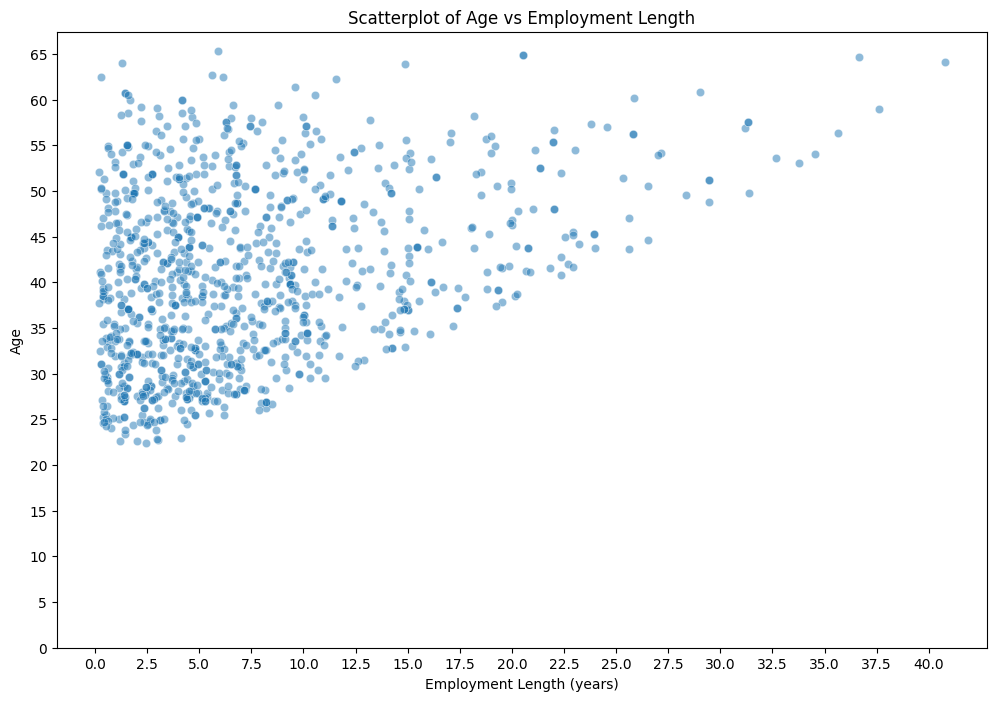

In [169]:
x_employ_length = np.abs(cc_train_copy[cc_train_copy['Employment length'] < 0]['Employment length'])/365.25
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x=x_employ_length, y=y_age, alpha=0.5)
# change the frequency of the x-axis and y-axis labels
plt.xticks(np.arange(0, x_employ_length.max(), 2.5))
plt.yticks(np.arange(0, y_age.max(), 5))
plt.xlabel('Employment Length (years)')
plt.ylabel('Age')
plt.title('Scatterplot of Age vs Employment Length')
plt.show()


Interpretation:
- This scatterplot shows that the age of the applicants is correlated with the length of the employment.
The reason why it is shaped like a reversed triangle, it is because the age of the applicants increase with the length of the employment. You can't have an employment length > than the age.

#### 2.4.1.2 Correlation analysis

In [170]:
# change the datatype of target feature to int
is_high_risk_int = cc_train_copy['Is high risk'].astype('int32')

### 2.4.2 Numerical vs categorical features (ANOVA)

#### 2.4.2.1 Age vs the rest of categorical features

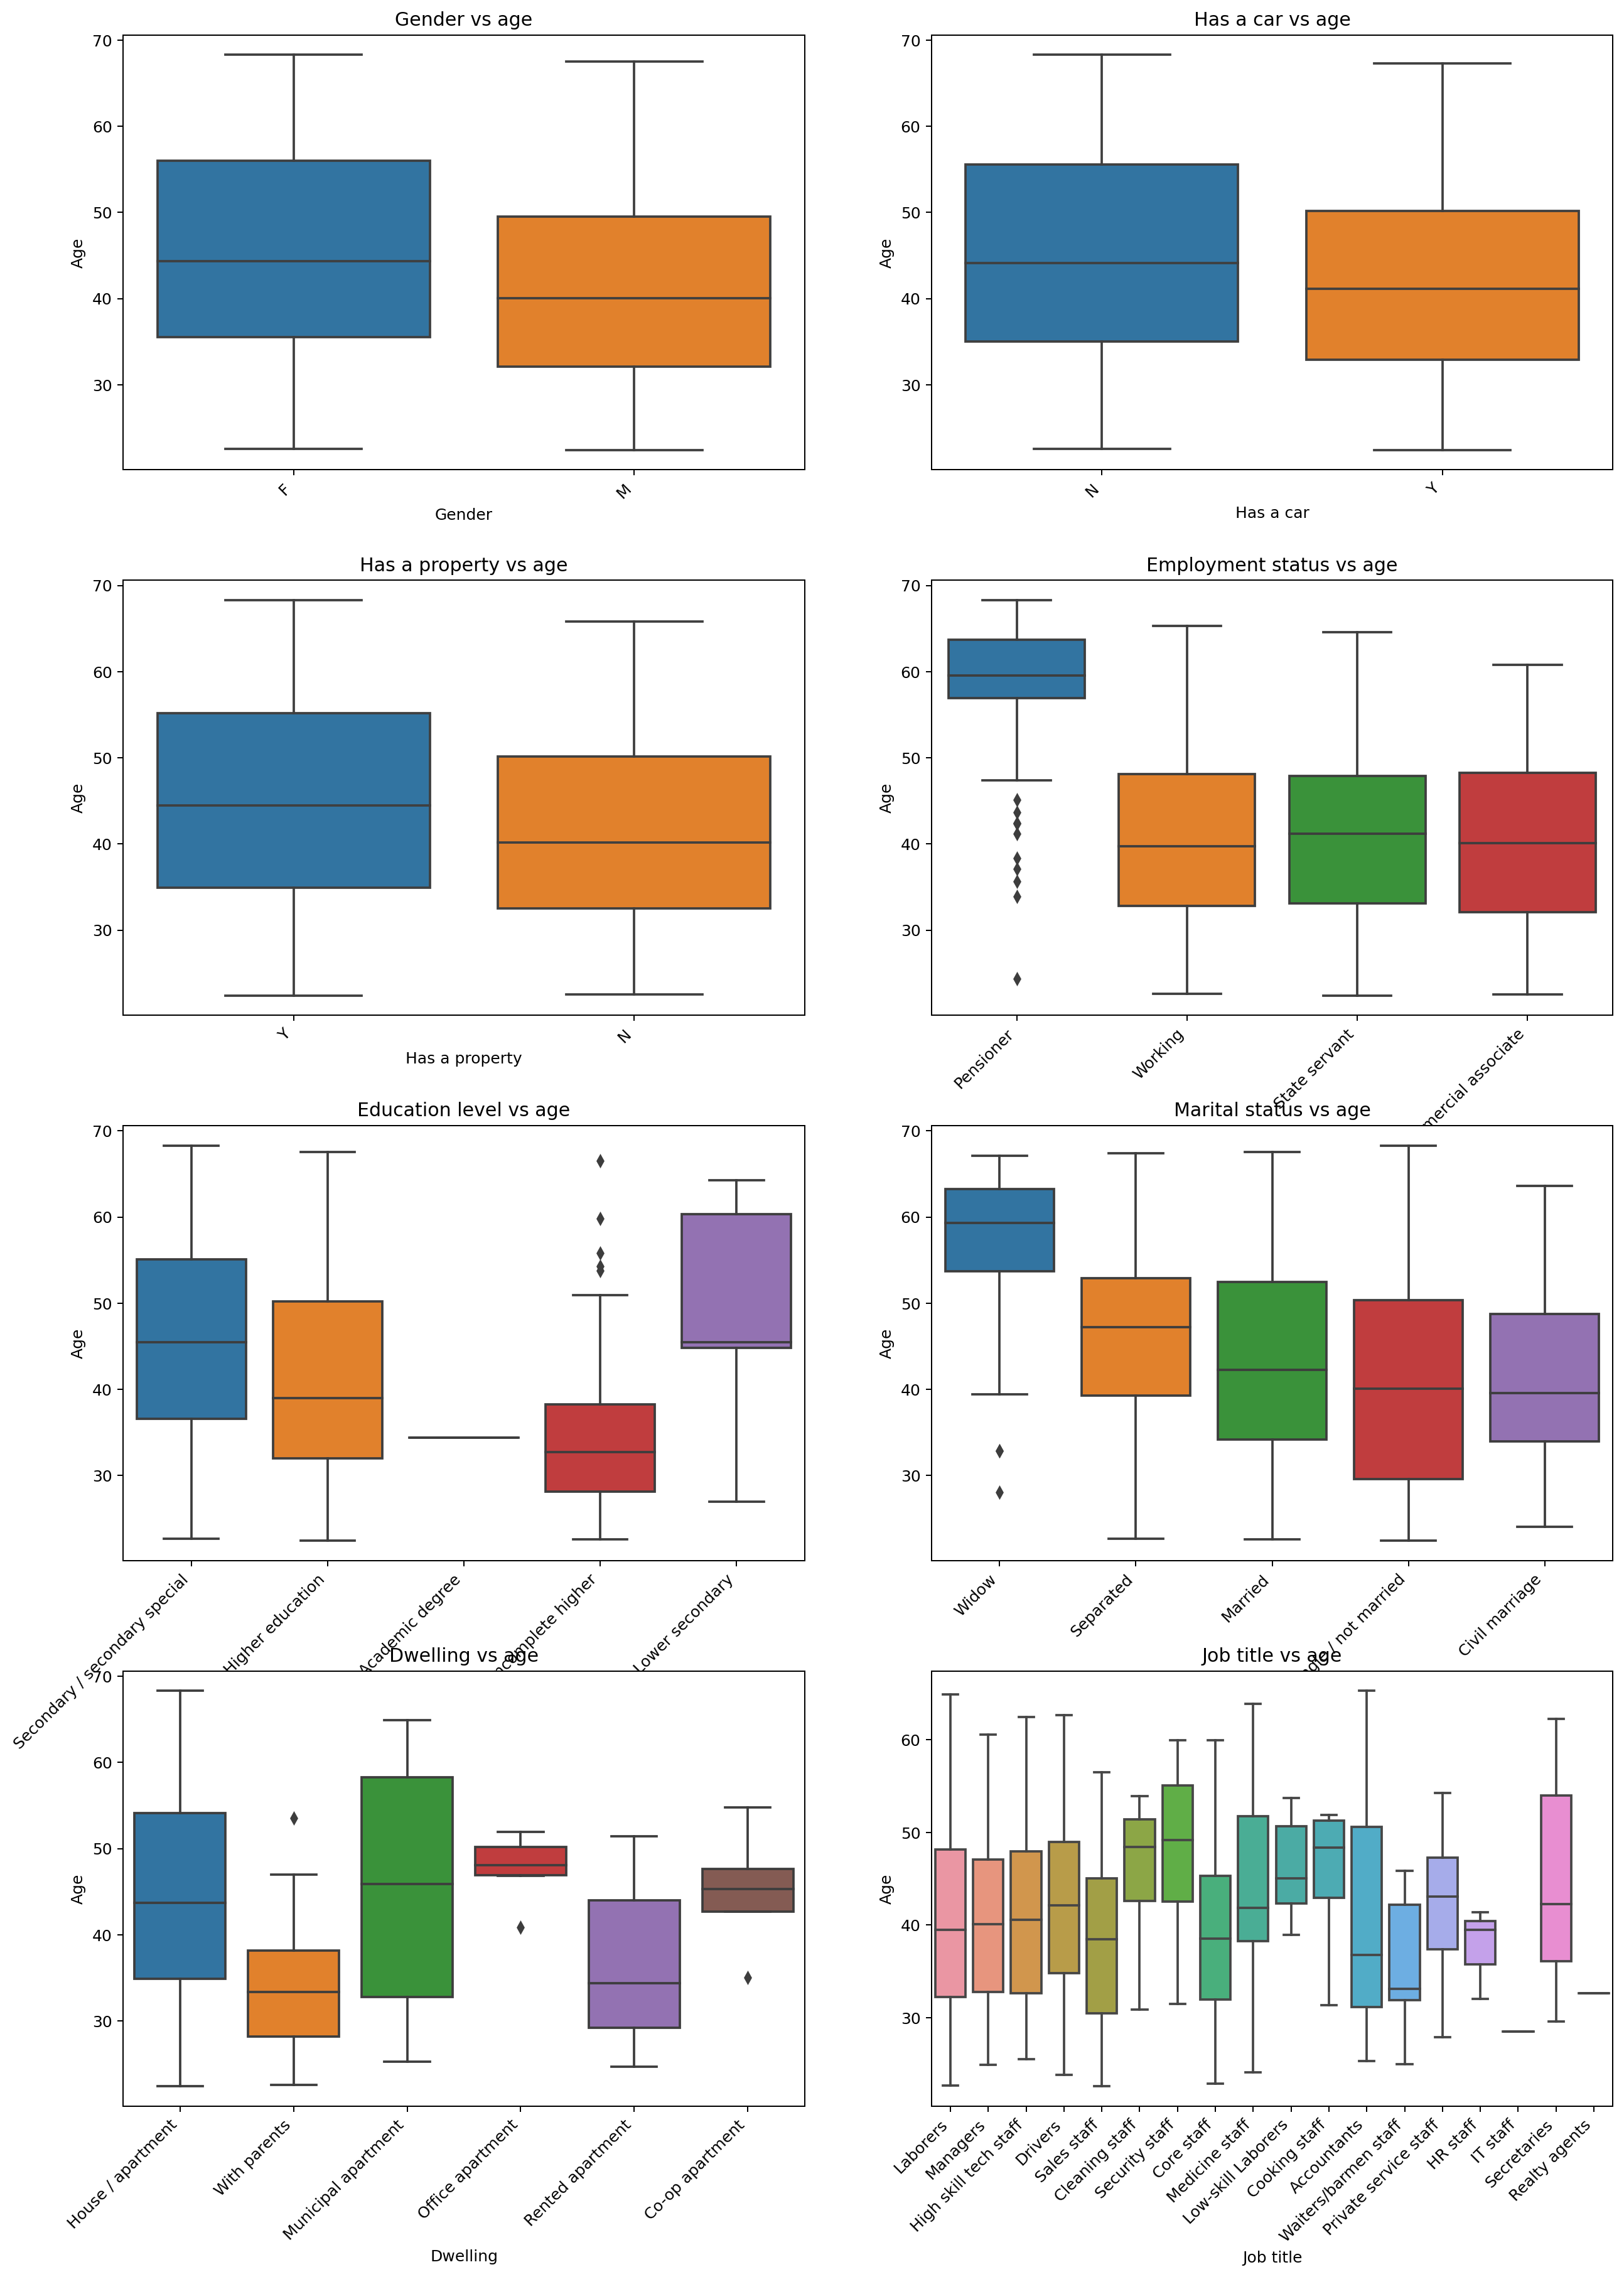

In [180]:
fig, axes = plt.subplots(4,2,figsize=(15,20),dpi=180)
fig.tight_layout(pad=5.0)
cat_features = ['Gender', 'Has a car', 'Has a property', 'Employment status', 'Education level', 'Marital status', 'Dwelling', 'Job title']
for cat_ft_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            sns.boxplot(ax=axes[row_count,feat_count],x=cc_train_copy[cat_features[cat_ft_count]],y=np.abs(cc_train_copy['Age'])/365.25)
            axes[row_count,feat_count].set_title(cat_features[cat_ft_count] + " vs age")
            plt.sca(axes[row_count,feat_count])
            plt.xticks(rotation=45,ha='right')
            plt.ylabel('Age')
            cat_ft_count += 1
    break

Interpretation:
- Female applicants are older than their male counterpart.
- Those who don't own a car tend to be older.
- Those who own a property tend to be older than those who don't.
- Of course, the pensioners are older that those who are working (We also see that some have pensioned at a young age, those are outliers).
- It is also interesting to see that those who hold an academic degree are younger in general than the other groups.
- Obviously, the widows tend to be much older. We also see some outliers in their 30's as well.
- With no surprise, those who live with parent tend to be younger. We also see some outlier as well.
- Lastly, who work as cleaning staff tend to be older while those who work in IT tend to be younger.

#### 2.4.2.2 Income vs the rest of categorical features

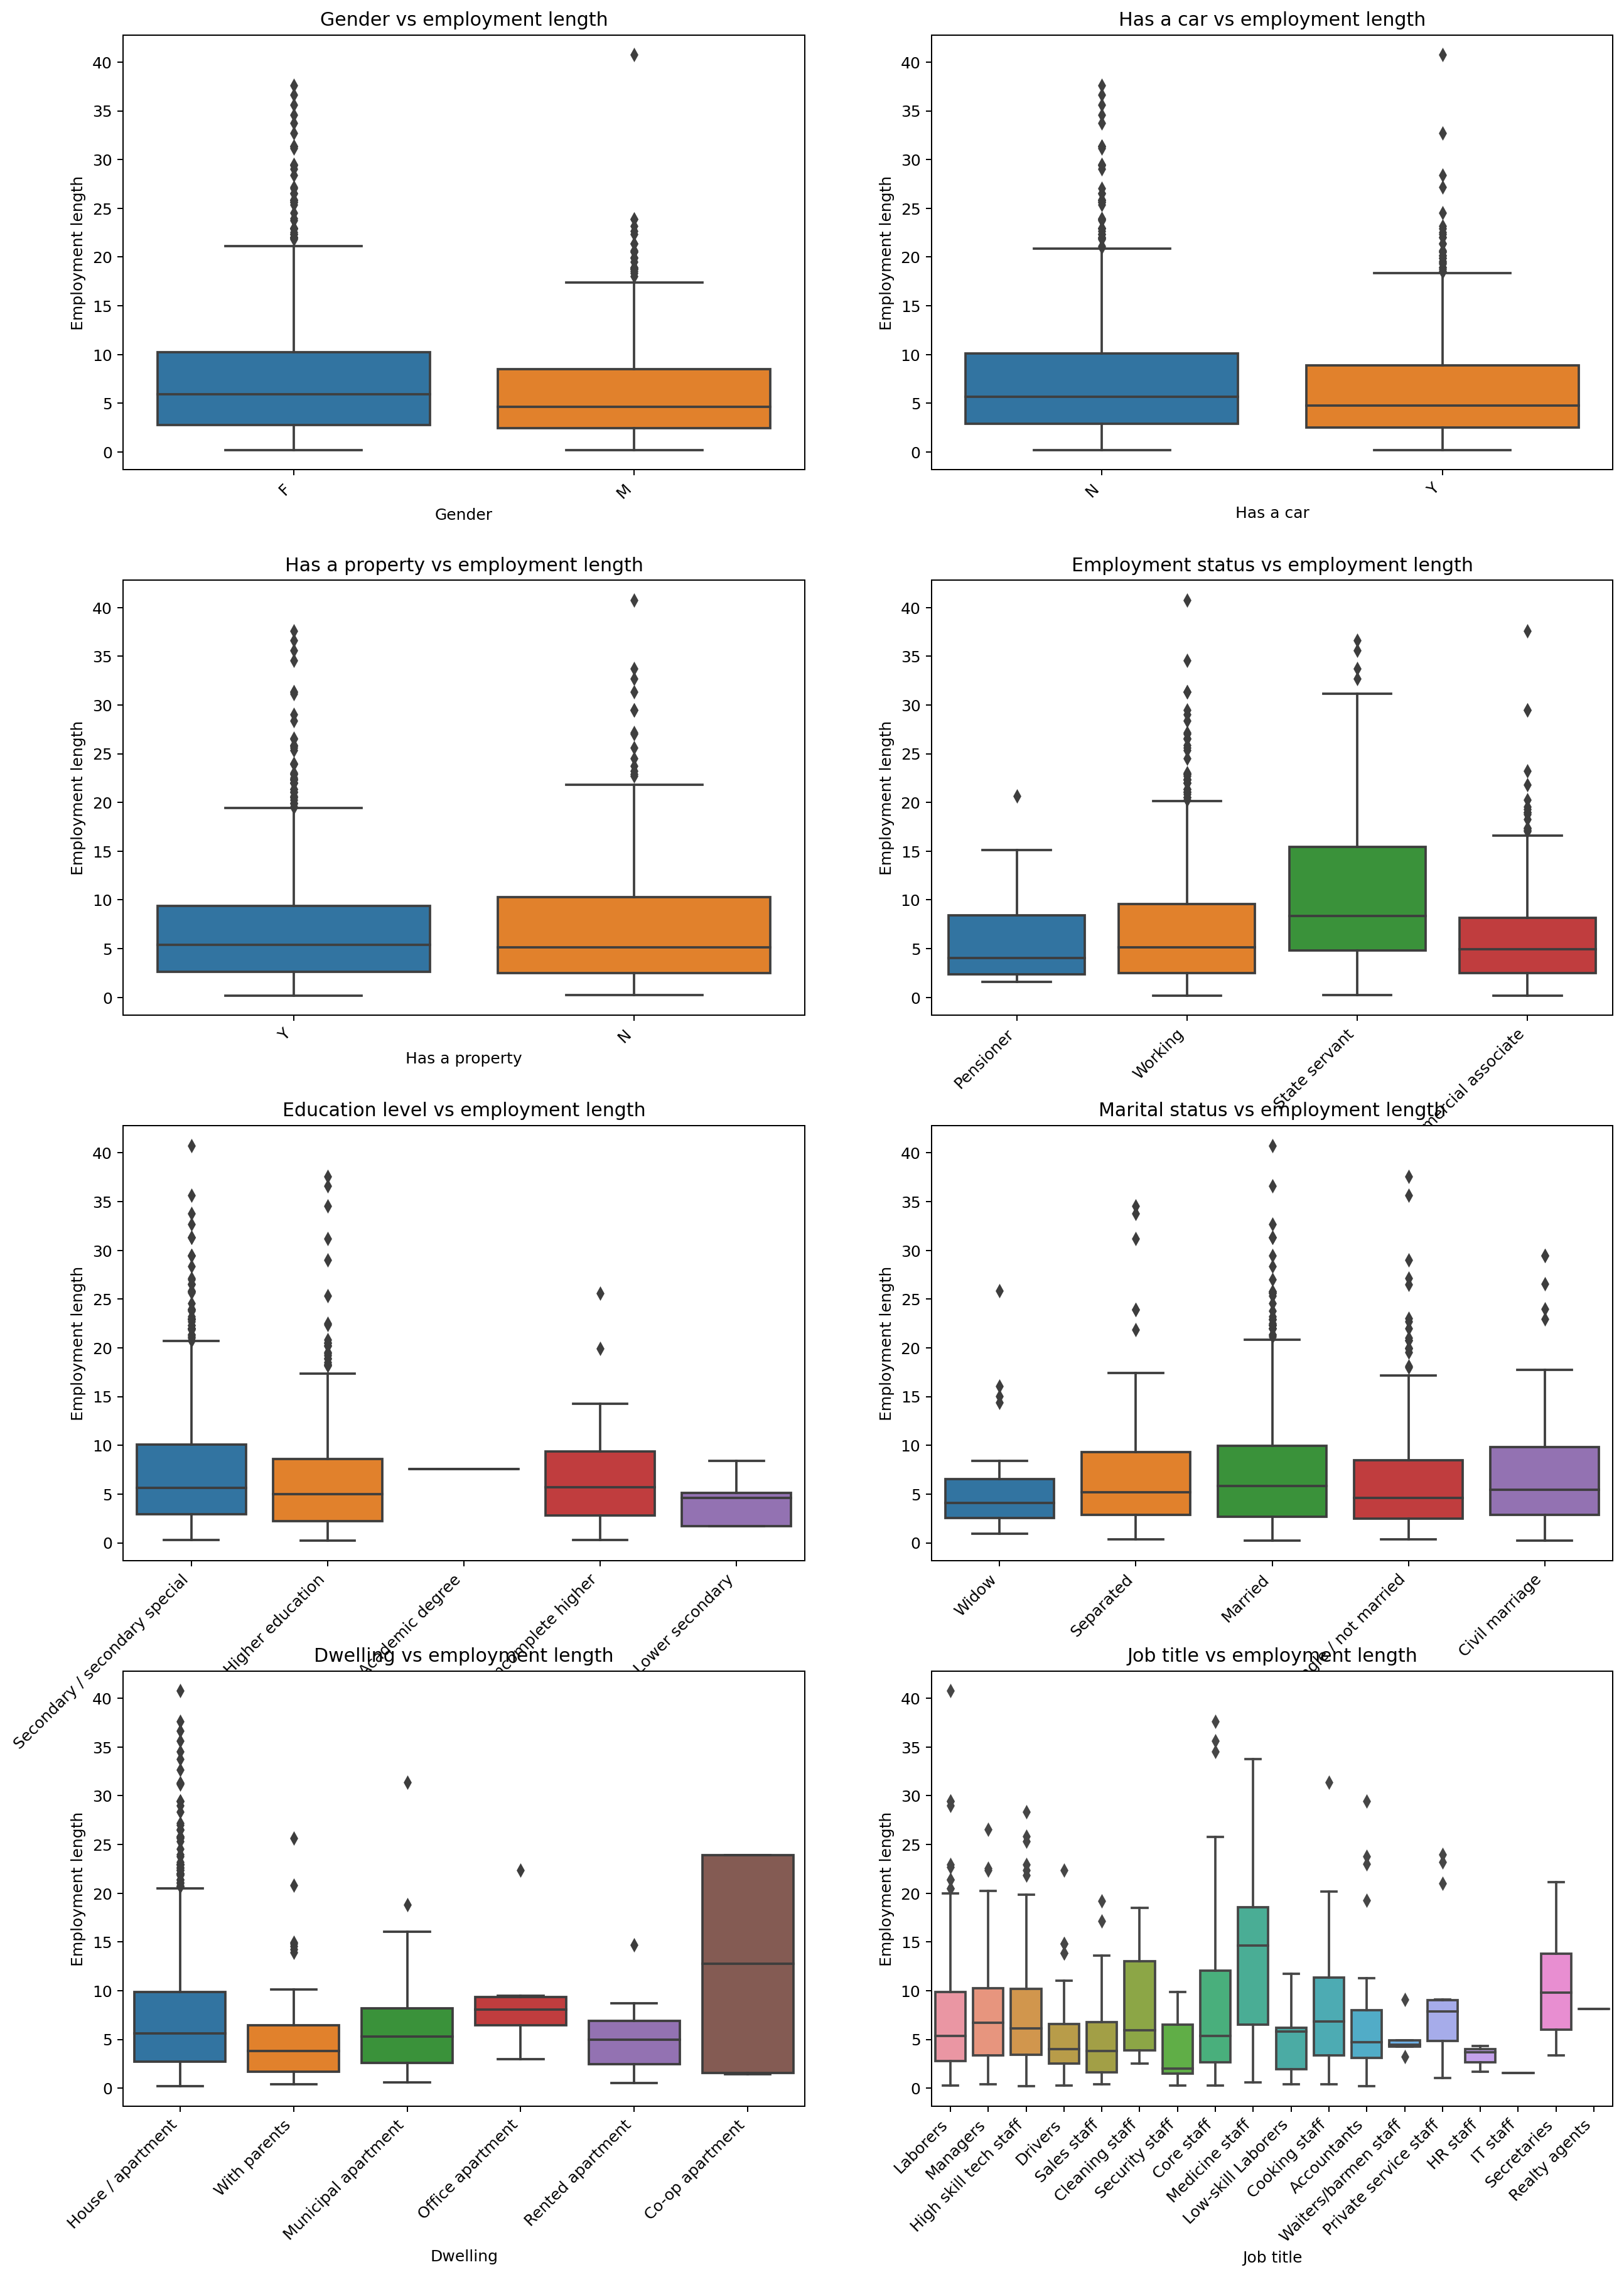

In [181]:
fig, axes = plt.subplots(4,2,figsize=(15,20),dpi=180)
fig.tight_layout(pad=5.0)

for cat_ft_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            sns.boxplot(ax=axes[row_count,feat_count],x=cc_train_copy[cat_features[cat_ft_count]],y=np.abs(cc_train_copy[cc_train_copy['Employment length'] < 0]['Employment length'])/365.25)
            axes[row_count,feat_count].set_title(cat_features[cat_ft_count] + " vs employment length")
            plt.sca(axes[row_count,feat_count])
            plt.ylabel('Employment length')
            plt.xticks(rotation=45,ha='right')
            cat_ft_count += 1
    break

Interpretation:
- State employed applicant tend to have been employed longer than the rest.
- Those who work in the medical field, have been employed longer than the rest.

### 2.4.3 Categorical vs categorical features (Chi-square test)

Null hypothesis: the feature's categories have no effect on the target variable.
Alternate hypothesis: one(or more) of the feature categories has a significant effect on the target variable.

In [182]:
def chi_func(feature):
    # selection row with high risk
    high_risk_ft = cc_train_copy[cc_train_copy['Is high risk'] == 1][feature]
    high_risk_ft_ct = pd.crosstab(index=high_risk_ft, columns=['Count']).rename_axis(None, axis=1)
    # drop the index feature name
    high_risk_ft_ct.index.name = None
    # observe values
    obs = high_risk_ft_ct
    print('Observed values:\n')
    print(obs)
    print('\n')
    # expected values
    print(obs.index)
    exp = pd.DataFrame([obs['Count'].sum()/len(obs)] * len(obs.index),columns=['Count'], index=obs.index)
    print('Expected values:\n')
    print(exp)
    print('\n')
    # chi-square test
    chi_squared_stat = (((obs-exp)**2)/exp).sum()
    print('Chi-square:\n')
    print(chi_squared_stat[0])
    print('\n')
    #critical value
    crit = stats.chi2.ppf(q = 0.95, df = len(obs) - 1)
    print('Critical value:\n')
    print(crit)
    print('\n')
    # p-value
    p_value = 1 - stats.chi2.cdf(x = chi_squared_stat, df = len(obs) - 1)
    print('P-value:\n')
    print(p_value)
    print('\n')
    if chi_squared_stat[0] >= crit:
        print('Reject the null hypothesis')
    elif chi_squared_stat[0] <= crit:
        print('Fail to reject the null hypothesis')

In [184]:
from scipy import stats
cat_ft = ['Gender', 'Has a car', 'Has a property', 'Employment status', 'Education level', 'Marital status', 'Dwelling', 'Job title']
for ft in cat_ft:
    print('\n\n**** {} ****\n'.format(ft))
    chi_func(ft)



**** Gender ****

Observed values:

   Count
F     77
M     63


Index(['F', 'M'], dtype='object')
Expected values:

   Count
F  70.00
M  70.00


Chi-square:

1.4


Critical value:

3.841458820694124


P-value:

[0.23672357]


Fail to reject the null hypothesis


**** Has a car ****

Observed values:

   Count
N     85
Y     60


Index(['N', 'Y'], dtype='object')
Expected values:

   Count
N  72.50
Y  72.50


Chi-square:

4.310344827586207


Critical value:

3.841458820694124


P-value:

[0.03788128]


Reject the null hypothesis


**** Has a property ****

Observed values:

   Count
N     52
Y     93


Index(['N', 'Y'], dtype='object')
Expected values:

   Count
N  72.50
Y  72.50


Chi-square:

11.593103448275862


Critical value:

3.841458820694124


P-value:

[0.00066197]


Reject the null hypothesis


**** Employment status ****

Observed values:

                      Count
Commercial associate     42
Pensioner                34
State servant             6
Working                

## 2.5 Business findings from the EDA

- ***Typical profile of an applicant is: a Female in her early 40’s, married with a partner and no child. She has been employed for 5 years with a salary of 194770. She has completed her secondary education. She does not own a car but owns a property (a house/ apartment). Her account is 26 months old.***
- ***Age and income do not have any effects on the target variable***
- ***Those who are flagged as bad client, tend to have a shorter employment length and older accounts. They also constitute less than 2% of total applicants.***
- ***Most applicants are mid thirties to mid fifties years old.***

# 3. Prepare the data

## 3.1 Transform to be done on each feature

Ind_ID:
* Drop the feature

Gender:
* One hot encoding

Age:
* Min-max scaling
* Fix skewness
* Abs value and div 365.25

Marital status:
* One hot encoding

Family member count
* Fix outliers

Children count
* Fix outliers
* Drop feature

Dwelling
* One hot encoding

Income
* Remove outliers
* Fix skewness
* Min-max scaling

Job title
* One hot encoding
* Impute missing values

Employment status:
* One hot encoding

Education level:
* Ordinal encoding

Employment length:
* Remove outliers
* Min-max scaling
* Abs value and div 365.25
* change days of employments of retirees to 0

Has a car:
* Change it numerical
* One-hot encoding

Has a property:
* Change it numerical
* One-hot encoding

Has a mobile phone:
* Drop feature

Has a work phone:
* One-hot encoding

Has a phone:
* One-hot encoding

Has an email:
* One-hot encoding

Is high risk(Target):
* Change the data type to numerical
* balance the data with SMOTE

## 3.2 Data Cleaning & Feature selection

In [387]:
# Make a copy of the dataset.
cc_train_copy5=cc_train_copy.copy()

### 3.2.1 Drop features

In [ ]:
# Drop the 'Ind_ID' and 'Has a mobile phone' features
cc_train_copy5.drop(['Ind_ID', 'Has a mobile phone'], axis=1, inplace=True)


In [399]:
# Drop the 'Ind_ID' and 'Has a mobile phone' features
cc_train_copy5.drop(['Children count'], axis=1, inplace=True)

Why are we droping these features?
- ID: ID is not useful for prediction, it helped us when we were merging the two datasets but after that, there is no need to keep it.
- Has a mobile phone: Since everyone has a mobile phone, this feature does not inform us about anything.
- Children count: is highly correlated with Family member count, and to avoid multicollinearity, we drop it.



### 3.2.2 Handling Missing & Null Values

In [390]:
# Impute missing values with mean for numerical columns
cc_train_copy5['Age'].fillna(cc_train_copy5['Age'].mean(), inplace=True)
cc_train_copy5['Income'].fillna(cc_train_copy5['Income'].mean(), inplace=True)

# Impute missing values with mode for categorical columns
cc_train_copy5['Gender'].fillna(cc_train_copy5['Gender'].mode()[0], inplace=True)
cc_train_copy5['Job title'].fillna(cc_train_copy5['Job title'].mode()[0], inplace=True)


In [401]:
#check the null values in the dataset
null_values_count = cc_train_copy5.isnull().sum()
print(null_values_count)

Gender                 0
Has a car              0
Has a property         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a work phone       0
Has a phone            0
Has an email           0
Job title              0
Family member count    0
Is high risk           0
dtype: int64


### 3.2.3 Feature Engineering

In [393]:
# Age
cc_train_copy5['Age'] = (cc_train_copy5['Age'].abs() / 365.25).astype(int)

# Income
cc_train_copy5['Income'] = cc_train_copy5['Income'].apply(lambda x: np.log1p(x))
cc_train_copy5['Income'] = (cc_train_copy5['Income'] - cc_train_copy5['Income'].min()) / (cc_train_copy5['Income'].max() - cc_train_copy5['Income'].min())

# Employment length
cc_train_copy5['Employment length'] = cc_train_copy5['Employment length'].abs() / 365.25
cc_train_copy5.loc[cc_train_copy5['Employment length'] > 100, 'Employment length'] = 0

# Family member count
cc_train_copy5['Family member count'] = cc_train_copy5['Family member count'].apply(lambda x: np.log1p(x))


### 3.2.4 Handling Outliers

In [394]:
# Define the columns to remove outliers
outlier_cols = ['Family member count', 'Income', 'Employment length']

# Calculate the interquartile range (IQR)
Q1 = cc_train_copy5[outlier_cols].quantile(0.25)
Q3 = cc_train_copy5[outlier_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the IQR method
cc_train_copy5 = cc_train_copy5[~((cc_train_copy5[outlier_cols] < lower_bound) | (cc_train_copy5[outlier_cols] > upper_bound)).any(axis=1)]



### 3.2.5 Ordinal encoding

In [395]:


# Define the ordinal categories in the desired order
education_categories = ['Lower secondary', 'Secondary / secondary special', 'Incomplete higher',
                        'Higher education', 'Academic degree']

# Create an instance of the OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[education_categories])

# Perform ordinal encoding on the 'Education level' column
cc_train_copy5['Education level'] = ordinal_encoder.fit_transform(cc_train_copy5[['Education level']])



In [402]:
cc_train_copy5.nunique()

Gender                   2
Has a car                2
Has a property           2
Income                  90
Employment status        4
Education level          5
Marital status           5
Dwelling                 6
Age                     47
Employment length      731
Has a work phone         2
Has a phone              2
Has an email             2
Job title               18
Family member count      5
Is high risk             2
dtype: int64

In [406]:
pd.set_option('display.max_columns', None)
cc_train_copy5.head()

Gender Has a car Has a property  Income Employment status  Education level  \
0      F         N              Y    0.47         Pensioner             1.00   
1      M         Y              N    0.40           Working             1.00   
2      F         Y              Y    0.65     State servant             1.00   
3      F         N              Y    0.44         Pensioner             1.00   
4      F         N              N    0.36           Working             1.00   

         Marital status           Dwelling  Age  Employment length  \
0                 Widow  House / apartment   57               0.00   
1             Separated       With parents   38               4.45   
2               Married  House / apartment   46               1.11   
3  Single / not married  House / apartment   56               0.00   
4               Married  House / apartment   43               1.77   

   Has a work phone  Has a phone  Has an email Job title  Family member count  \
0                 0            0             0  Laborers                 0.69   
1                 0            0             0  Laborers                 1.39   
2                 0            1             1  Laborers                 1.39   
3                 0            0             0  Laborers                 0.69   
4                 1            0             0  Laborers                 1.10   

   Is high risk  
0             0  
1             0  
2             0  
3             0  
4             0

### 3.2.6 One hot encoding 

In [429]:

# Select the columns with more than two unique values for one-hot encoding
columns_to_encode = ['Marital status', 'Dwelling', 'Job title', 'Employment status']

# Perform one-hot encoding for columns with more than two unique values
cc_train_copy5= pd.get_dummies(cc_train_copy5, columns=columns_to_encode)


In [430]:
cc_train_copy5.head()

Gender Has a car Has a property  Income  Education level  Age  \
0      F         N              Y    0.47             1.00   57   
1      M         Y              N    0.40             1.00   38   
2      F         Y              Y    0.65             1.00   46   
3      F         N              Y    0.44             1.00   56   
4      F         N              N    0.36             1.00   43   

   Employment length  Has a work phone  Has a phone  Has an email  \
0               0.00                 0            0             0   
1               4.45                 0            0             0   
2               1.11                 0            1             1   
3               0.00                 0            0             0   
4               1.77                 1            0             0   

   Family member count  Is high risk  Marital status_Civil marriage  \
0                 0.69             0                          False   
1                 1.39             0                          False   
2                 1.39             0                          False   
3                 0.69             0                          False   
4                 1.10             0                          False   

   Marital status_Married  Marital status_Separated  \
0                   False                     False   
1                   False                      True   
2                    True                     False   
3                   False                     False   
4                    True                     False   

   Marital status_Single / not married  Marital status_Widow  \
0                                False                  True   
1                                False                 False   
2                                False                 False   
3                                 True                 False   
4                                False                 False   

   Dwelling_Co-op apartment  Dwelling_House / apartment  \
0                     False                        True   
1                     False                       False   
2                     False                        True   
3                     False                        True   
4                     False                        True   

   Dwelling_Municipal apartment  Dwelling_Office apartment  \
0                         False                      False   
1                         False                      False   
2                         False                      False   
3                         False                      False   
4                         False                      False   

   Dwelling_Rented apartment  Dwelling_With parents  Job title_Accountants  \
0                      False                  False                  False   
1                      False                   True                  False   
2                      False                  False                  False   
3                      False                  False                  False   
4                      False                  False                  False   

   Job title_Cleaning staff  Job title_Cooking staff  Job title_Core staff  \
0                     False                    False                 False   
1                     False                    False                 False   
2                     False                    False                 False   
3                     False                    False                 False   
4                     False                    False                 False   

   Job title_Drivers  Job title_HR staff  Job title_High skill tech staff  \
0              False               False                            False   
1              False               False                            False   
2              False               False                            False   
3              False               False                           

### 3.2.7 Binary encoding 

In [431]:

# Select the columns with binary values for binary encoding
binary_columns = ['Gender', 'Has a car', 'Has a property']

# Perform binary encoding for columns with binary values
for column in binary_columns:
    cc_train_copy5[column] = cc_train_copy5[column].map({'F': 0, 'M': 1, 'N': 0, 'Y': 1})

# Print the encoded data
print(cc_train_copy5.head())


   Gender  Has a car  Has a property  Income  Education level  Age  \
0       0          0               1    0.47             1.00   57   
1       1          1               0    0.40             1.00   38   
2       0          1               1    0.65             1.00   46   
3       0          0               1    0.44             1.00   56   
4       0          0               0    0.36             1.00   43   

   Employment length  Has a work phone  Has a phone  Has an email  \
0               0.00                 0            0             0   
1               4.45                 0            0             0   
2               1.11                 0            1             1   
3               0.00                 0            0             0   
4               1.77                 1            0             0   

   Family member count  Is high risk  Marital status_Civil marriage  \
0                 0.69             0                          False   
1                 1.39

In [432]:
cc_train_copy5.head()

Gender  Has a car  Has a property  Income  Education level  Age  \
0       0          0               1    0.47             1.00   57   
1       1          1               0    0.40             1.00   38   
2       0          1               1    0.65             1.00   46   
3       0          0               1    0.44             1.00   56   
4       0          0               0    0.36             1.00   43   

   Employment length  Has a work phone  Has a phone  Has an email  \
0               0.00                 0            0             0   
1               4.45                 0            0             0   
2               1.11                 0            1             1   
3               0.00                 0            0             0   
4               1.77                 1            0             0   

   Family member count  Is high risk  Marital status_Civil marriage  \
0                 0.69             0                          False   
1                 1.39             0                          False   
2                 1.39             0                          False   
3                 0.69             0                          False   
4                 1.10             0                          False   

   Marital status_Married  Marital status_Separated  \
0                   False                     False   
1                   False                      True   
2                    True                     False   
3                   False                     False   
4                    True                     False   

   Marital status_Single / not married  Marital status_Widow  \
0                                False                  True   
1                                False                 False   
2                                False                 False   
3                                 True                 False   
4                                False                 False   

   Dwelling_Co-op apartment  Dwelling_House / apartment  \
0                     False                        True   
1                     False                       False   
2                     False                        True   
3                     False                        True   
4                     False                        True   

   Dwelling_Municipal apartment  Dwelling_Office apartment  \
0                         False                      False   
1                         False                      False   
2                         False                      False   
3                         False                      False   
4                         False                      False   

   Dwelling_Rented apartment  Dwelling_With parents  Job title_Accountants  \
0                      False                  False                  False   
1                      False                   True                  False   
2                      False                  False                  False   
3                      False                  False                  False   
4                      False                  False                  False   

   Job title_Cleaning staff  Job title_Cooking staff  Job title_Core staff  \
0                     False                    False                 False   
1                     False                    False                 False   
2                     False                    False                 False   
3                     False                    False                 False   
4                     False                    False                 False   

   Job title_Drivers  Job title_HR staff  Job title_High skill tech staff  \
0              False               False                            False   
1              False               False                            False   
2              False               False                            False   
3              False               False          

In [433]:
#check the null/ missing values in the cleaned & transformed dataset
null_values_count = cc_train_copy5.isnull().sum()
print(null_values_count)

Gender                                    0
Has a car                                 0
Has a property                            0
Income                                    0
Education level                           0
Age                                       0
Employment length                         0
Has a work phone                          0
Has a phone                               0
Has an email                              0
Family member count                       0
Is high risk                              0
Marital status_Civil marriage             0
Marital status_Married                    0
Marital status_Separated                  0
Marital status_Single / not married       0
Marital status_Widow                      0
Dwelling_Co-op apartment                  0
Dwelling_House / apartment                0
Dwelling_Municipal apartment              0
Dwelling_Office apartment                 0
Dwelling_Rented apartment                 0
Dwelling_With parents           

### 3.2.8 Oversampling

In [434]:
cc_train_copy5.shape

(1150, 45)

In [435]:
class_distribution =cc_train_copy5["Is high risk"].value_counts()
print(class_distribution)


Is high risk
0    1014
1     136
Name: count, dtype: int64


In [436]:
from imblearn.over_sampling import SMOTE

# Separate the features (X) and target variable (y)
X = cc_train_copy5.drop('Is high risk', axis=1)
y = cc_train_copy5['Is high risk']

# Create the SMOTE object
smote = SMOTE(random_state=42)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)


We are oversampling with SMOTE because the minority class (Is high risk = 1) is very rare in the data.

In [437]:
cc_train_copy5.head()

Gender  Has a car  Has a property  Income  Education level  Age  \
0       0          0               1    0.47             1.00   57   
1       1          1               0    0.40             1.00   38   
2       0          1               1    0.65             1.00   46   
3       0          0               1    0.44             1.00   56   
4       0          0               0    0.36             1.00   43   

   Employment length  Has a work phone  Has a phone  Has an email  \
0               0.00                 0            0             0   
1               4.45                 0            0             0   
2               1.11                 0            1             1   
3               0.00                 0            0             0   
4               1.77                 1            0             0   

   Family member count  Is high risk  Marital status_Civil marriage  \
0                 0.69             0                          False   
1                 1.39             0                          False   
2                 1.39             0                          False   
3                 0.69             0                          False   
4                 1.10             0                          False   

   Marital status_Married  Marital status_Separated  \
0                   False                     False   
1                   False                      True   
2                    True                     False   
3                   False                     False   
4                    True                     False   

   Marital status_Single / not married  Marital status_Widow  \
0                                False                  True   
1                                False                 False   
2                                False                 False   
3                                 True                 False   
4                                False                 False   

   Dwelling_Co-op apartment  Dwelling_House / apartment  \
0                     False                        True   
1                     False                       False   
2                     False                        True   
3                     False                        True   
4                     False                        True   

   Dwelling_Municipal apartment  Dwelling_Office apartment  \
0                         False                      False   
1                         False                      False   
2                         False                      False   
3                         False                      False   
4                         False                      False   

   Dwelling_Rented apartment  Dwelling_With parents  Job title_Accountants  \
0                      False                  False                  False   
1                      False                   True                  False   
2                      False                  False                  False   
3                      False                  False                  False   
4                      False                  False                  False   

   Job title_Cleaning staff  Job title_Cooking staff  Job title_Core staff  \
0                     False                    False                 False   
1                     False                    False                 False   
2                     False                    False                 False   
3                     False                    False                 False   
4                     False                    False                 False   

   Job title_Drivers  Job title_HR staff  Job title_High skill tech staff  \
0              False               False                            False   
1              False               False                            False   
2              False               False                            False   
3              False               False          

<Axes: >

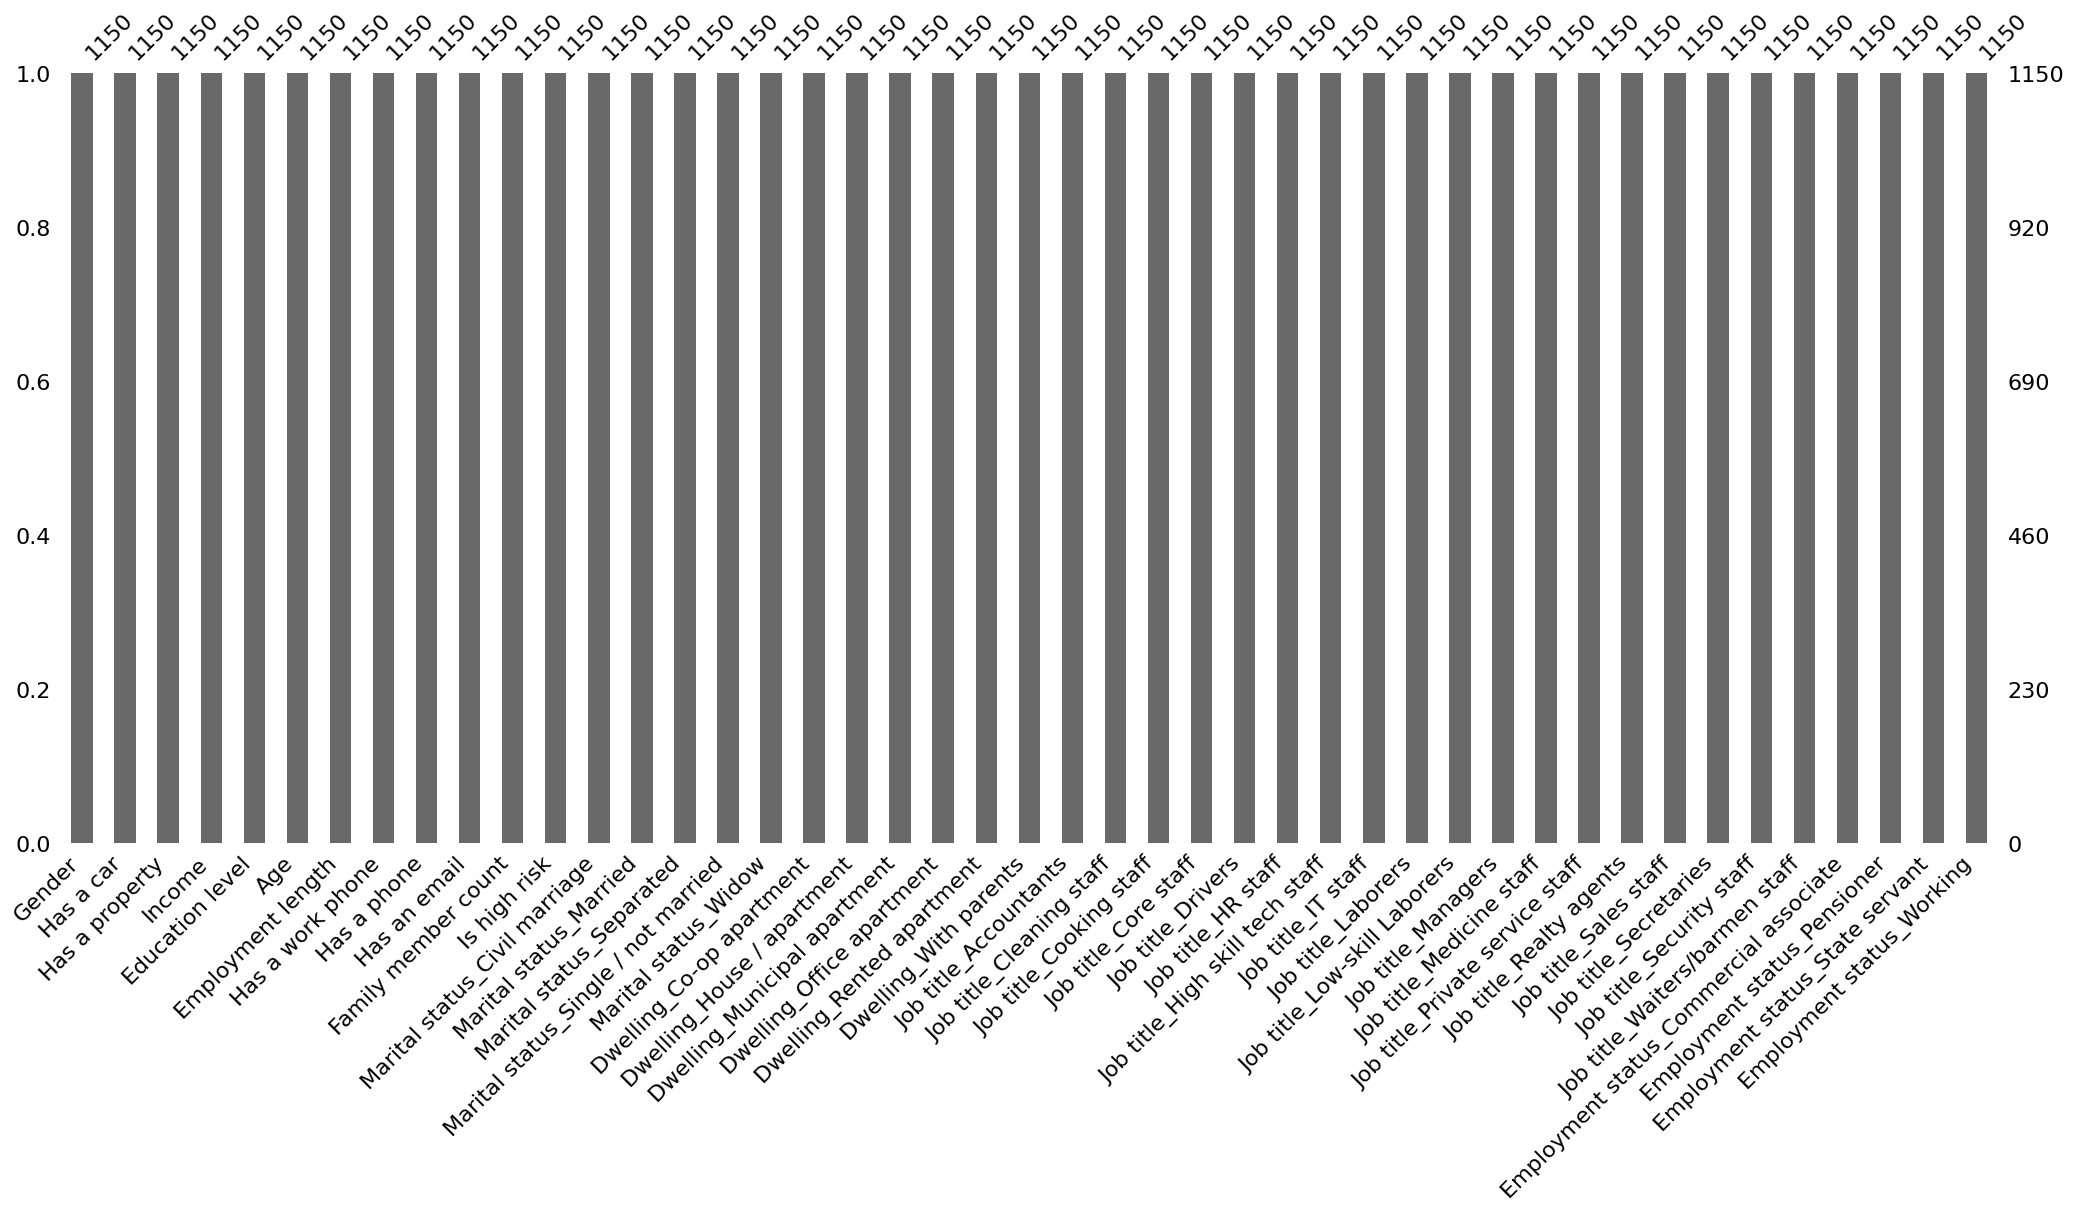

In [438]:
msno.bar(cc_train_copy5)

<Axes: >

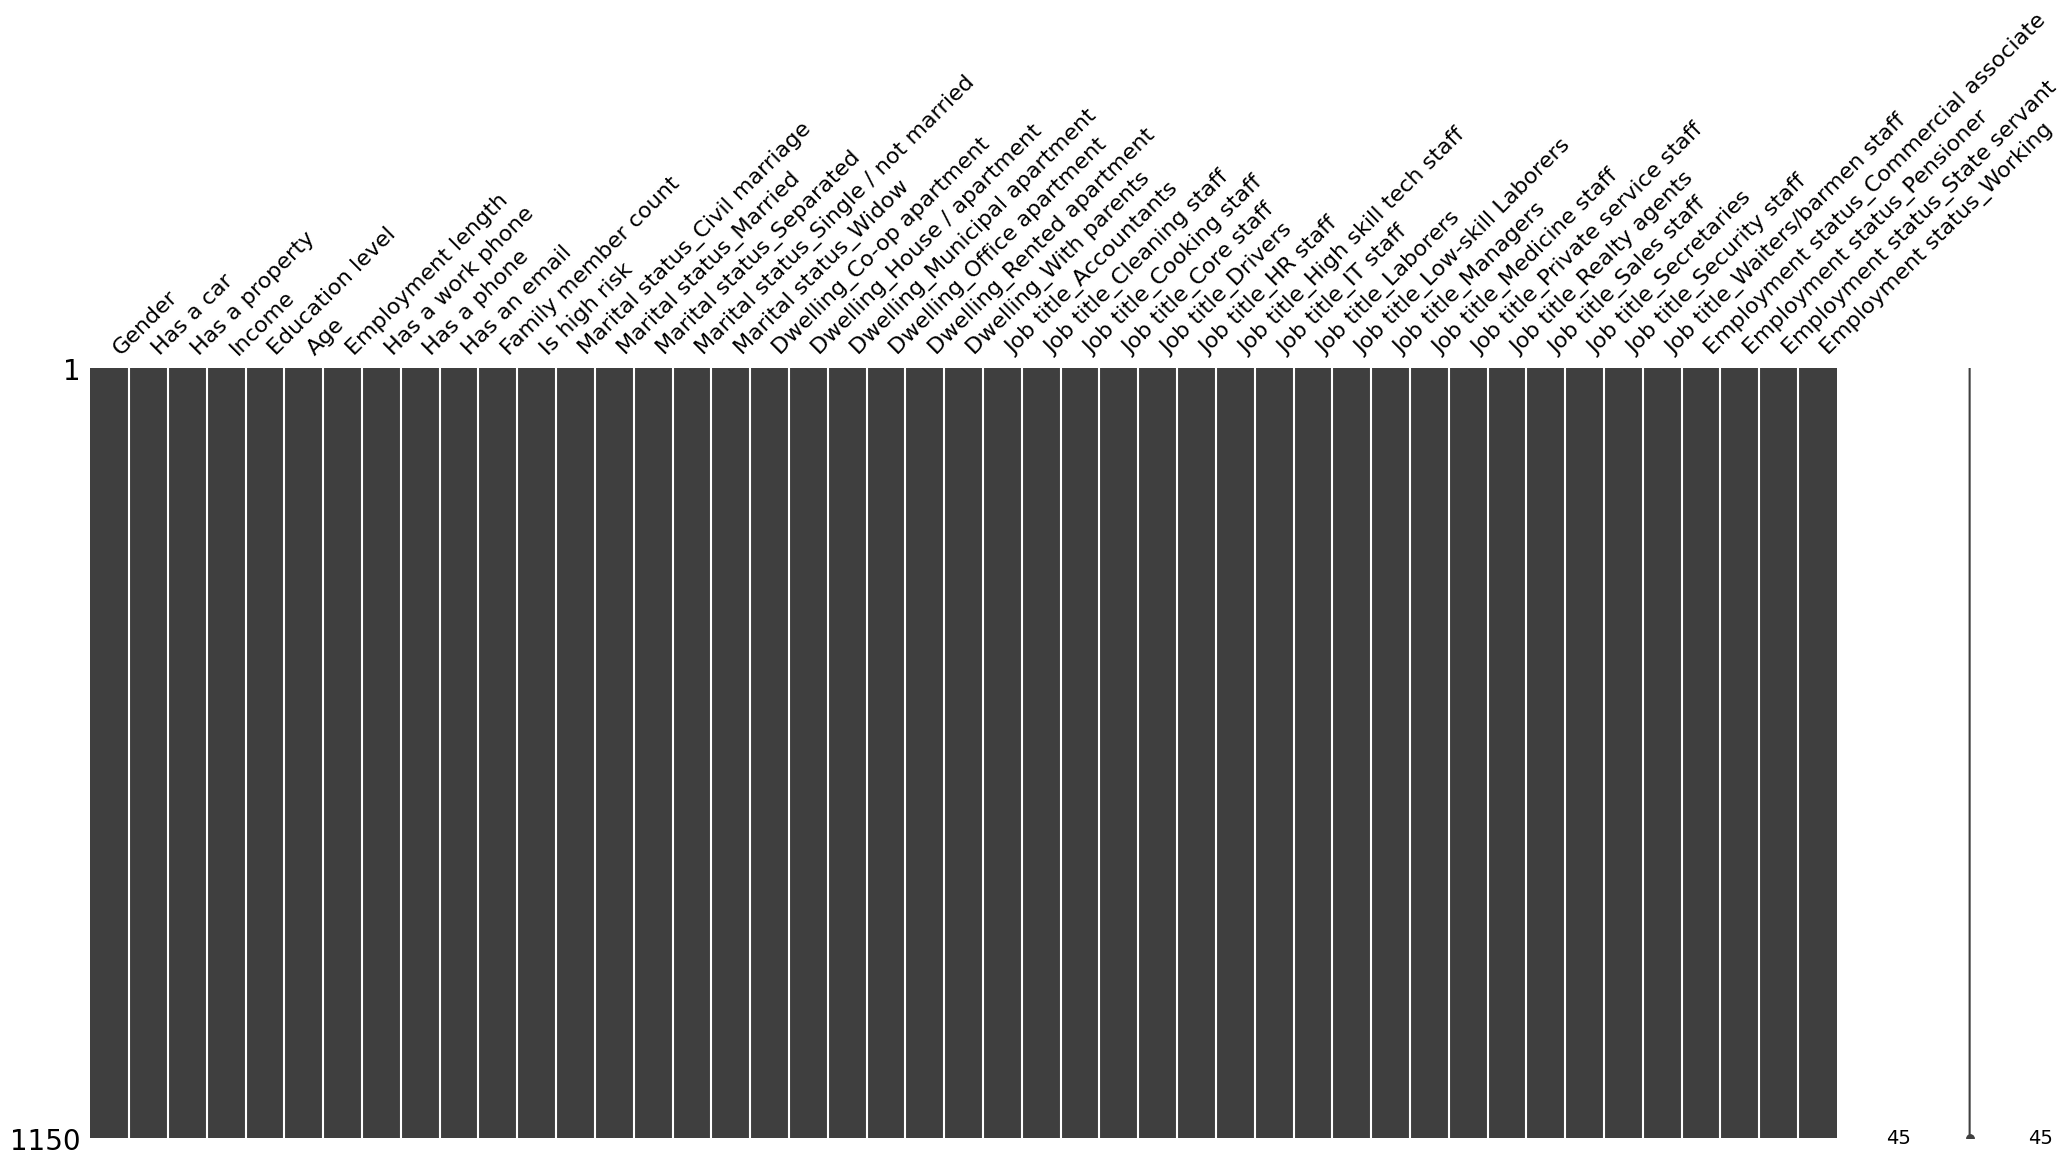

In [439]:
msno.matrix(cc_train_copy5)

c:\Users\Chiranth\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\Chiranth\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

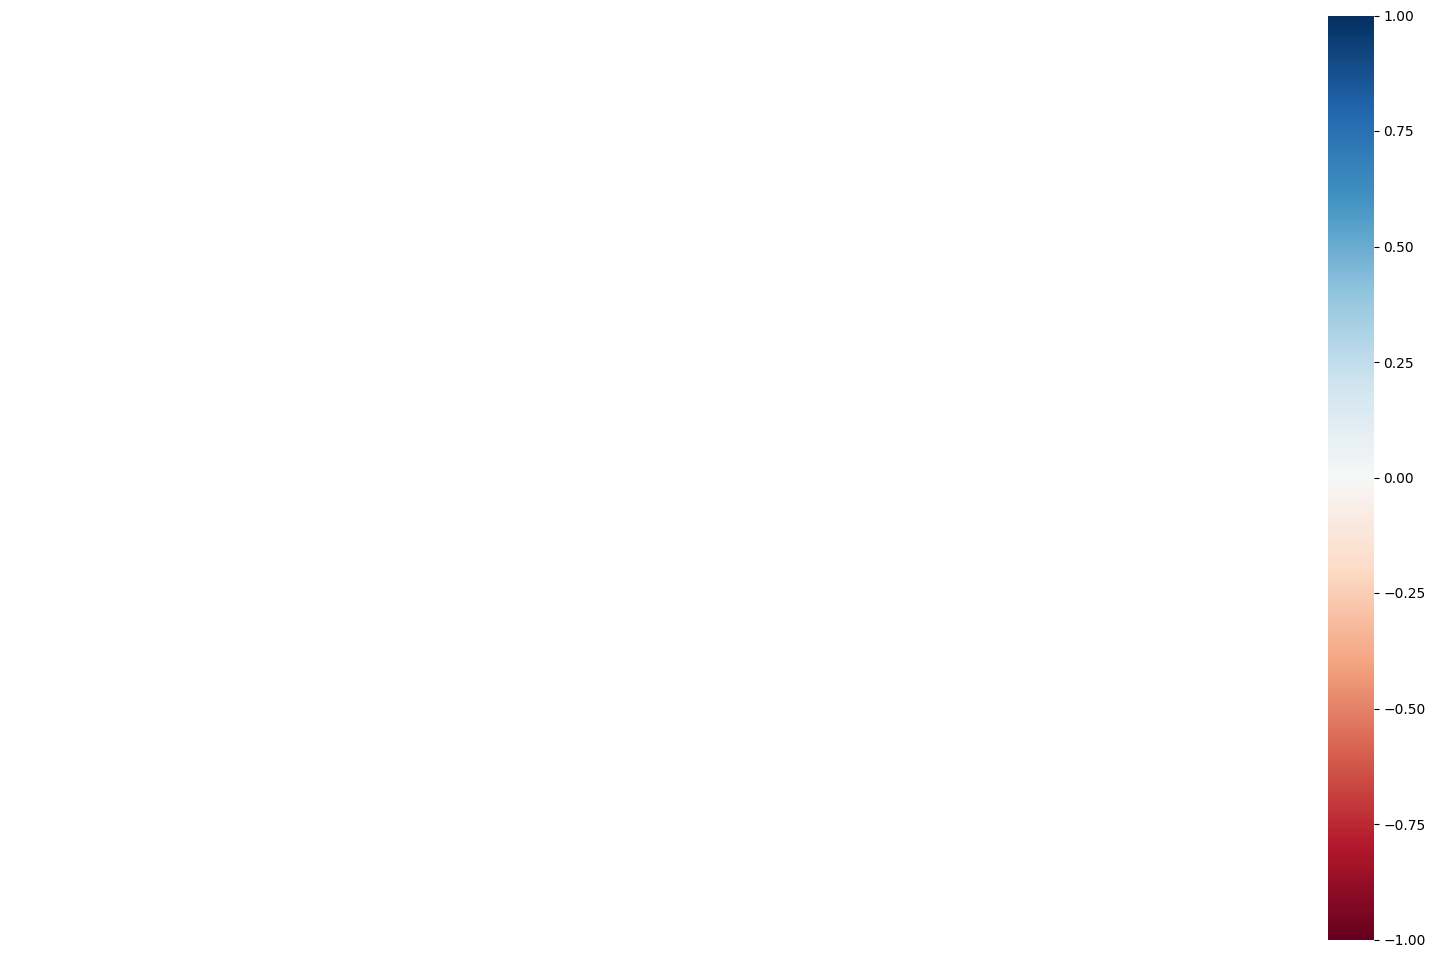

In [440]:
msno.heatmap(cc_train_copy5)

In [444]:
# split the train data into X and y (target)
X_cc_train_prep, y_cc_train_prep = cc_train_prep.loc[:, cc_train_prep.columns != 'Is high risk'], cc_train_prep['Is high risk'].astype('int64')

# 4. Machine Learning Approach with promising Models

## 4.1 Models training

## 4.1.1 Logistic Regression

In [478]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
logistic_regression = LogisticRegression()

# Fit the model to the training data
logistic_regression.fit(X_cc_train_prep, y_cc_train_prep)


c:\Users\Chiranth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [479]:
# Predict on the training data
y_train_pred = logistic_regression.predict(X_cc_train_prep)

# Calculate the accuracy
accuracy = accuracy_score(y_cc_train_prep, y_train_pred)
print("Accuracy:", accuracy)

# Compute the confusion matrix
cm = confusion_matrix(y_cc_train_prep, y_train_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.8843478260869565
Confusion Matrix:
[[1014    0]
 [ 133    3]]


## 4.1.2 Random Forest Classifier

In [480]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest model
random_forest = RandomForestClassifier()

# Fit the model to the training data
random_forest.fit(X_cc_train_prep, y_cc_train_prep)


RandomForestClassifier()

In [481]:

# Predict on the training data
y_train_pred = random_forest.predict(X_cc_train_prep)

# Calculate the accuracy
accuracy = accuracy_score(y_cc_train_prep, y_train_pred)
print("Accuracy:", accuracy)

# Compute the confusion matrix
cm = confusion_matrix(y_cc_train_prep, y_train_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.9930434782608696
Confusion Matrix:
[[1010    4]
 [   4  132]]


## 4.1.3 SVC (Support Vector Machine)

In [486]:
from sklearn.svm import SVC

# Create an instance of the SVM model
svm = SVC()

# Fit the model to the training data
svm.fit(X_cc_train_prep, y_cc_train_prep)


SVC()

In [488]:
# Train the SVC model
svc = SVC()
svc.fit(X_cc_train_prep, y_cc_train_prep)

# Predict on the training data
y_train_pred = svc.predict(X_cc_train_prep)

# Calculate the accuracy
accuracy = accuracy_score(y_cc_train_prep, y_train_pred)
print("Accuracy:", accuracy)

# Compute the confusion matrix
cm = confusion_matrix(y_cc_train_prep, y_train_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.8817391304347826
Confusion Matrix:
[[1014    0]
 [ 136    0]]


## 4.1.4 Gradient Boosting Classifier

In [489]:
from sklearn.ensemble import GradientBoostingClassifier

# Create an instance of the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier()

# Fit the model to the training data
gradient_boosting.fit(X_cc_train_prep, y_cc_train_prep)


GradientBoostingClassifier()

In [490]:
# Train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_cc_train_prep, y_cc_train_prep)

# Predict on the training data
y_train_pred = gb_classifier.predict(X_cc_train_prep)

# Calculate the accuracy
accuracy = accuracy_score(y_cc_train_prep, y_train_pred)
print("Accuracy:", accuracy)

# Compute the confusion matrix
cm = confusion_matrix(y_cc_train_prep, y_train_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.9208695652173913
Confusion Matrix:
[[1013    1]
 [  90   46]]


## 4.1.5 Decision Tree Classifier

In [491]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the Decision Tree model
decision_tree = DecisionTreeClassifier()

# Fit the model to the training data
decision_tree.fit(X_cc_train_prep, y_cc_train_prep)


DecisionTreeClassifier()

In [492]:
# Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_cc_train_prep, y_cc_train_prep)

# Predict on the training data
y_train_pred = dt_classifier.predict(X_cc_train_prep)

# Calculate the accuracy
accuracy = accuracy_score(y_cc_train_prep, y_train_pred)
print("Accuracy:", accuracy)

# Compute the confusion matrix
cm = confusion_matrix(y_cc_train_prep, y_train_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.9930434782608696
Confusion Matrix:
[[1012    2]
 [   6  130]]


## 4.2 Classification Report

In [546]:
from sklearn.metrics import classification_report

# Decision Tree Classifier
dt_report = classification_report(y_cc_train_prep, decision_tree.predict(X_cc_train_prep))
print("Decision Tree Classifier Report:")
print(dt_report)

# Gradient Boosting Classifier
gb_report = classification_report(y_cc_train_prep, gradient_boosting.predict(X_cc_train_prep))
print("Gradient Boosting Classifier Report:")
print(gb_report)

# SVC model
svm_report = classification_report(y_cc_train_prep, svm.predict(X_cc_train_prep))
print("SVC Classifier Report:")
print(svm_report)

# Random Forest Classifier
rf_report = classification_report(y_cc_train_prep, random_forest.predict(X_cc_train_prep))
print("Random Forest Classifier Report:")
print(rf_report)

# Logistic Regression Classifier
lr_report = classification_report(y_cc_train_prep, logistic_regression.predict(X_cc_train_prep))
print("Logistic Regression Classifier Report:")
print(lr_report)


Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1014
           1       0.98      0.96      0.97       136

    accuracy                           0.99      1150
   macro avg       0.99      0.98      0.98      1150
weighted avg       0.99      0.99      0.99      1150

Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1014
           1       0.98      0.38      0.54       136

    accuracy                           0.93      1150
   macro avg       0.95      0.69      0.75      1150
weighted avg       0.93      0.93      0.91      1150



c:\Users\Chiranth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Chiranth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Chiranth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

SVC Classifier Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1014
           1       0.00      0.00      0.00       136

    accuracy                           0.88      1150
   macro avg       0.44      0.50      0.47      1150
weighted avg       0.78      0.88      0.83      1150

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1014
           1       0.97      0.97      0.97       136

    accuracy                           0.99      1150
   macro avg       0.98      0.98      0.98      1150
weighted avg       0.99      0.99      0.99      1150

Logistic Regression Classifier Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1014
           1       1.00      0.02      0.04       136

    accuracy                           0.88      1150
   macro avg       0.94      0.51

Since the objective of this problem is to minimize the risk of credit default for the financial institution, the metrics to use depends on the current economical situation:

- During the time of a bull market (when the economy is expending), people feel wealthy and usually are employed. Money is usually cheap and the risk of default is low. The financial institution is able to handle the risk of default therefore is not very strict on giving out credit. The financial institution can handle a number of bad clients as long as the vast majority of applicants are good clients (aka those who payback their credit).In this case, having a good recall (sensitivity) is ideal.
- During a bear market (when the economy is contracting), people loose their jobs and their money through the stock market. Many people struggle to meet their financial obligations. The financial institution therefore tend to be more conservative on giving out credit or loans. The financial institution can't afford to give out credit to clients who won't be able to pay back their credit. The financial institution would rather have a smaller number of good clients even if it means that some good clients where denied credit, and ideally not have any bad client. In this case, having a good precision (specificity) is desirable.

Note: There is always a trade-off between precision and recall. Choosing the right metrics depends on the problem you are solving.



## 4.3 Top model

 We can conclude that our top model is:- Random Forest classifier


- Decision Tree Classifier: The Decision Tree Classifier shows high precision, recall, and F1-scores, but it may be prone to overfitting and lack robustness compared to ensemble methods like Random Forest.
- Gradient Boosting Classifier: The Gradient Boosting Classifier shows relatively lower performance for class 1, indicating potential difficulty in correctly identifying rejected applications.
- SVC Classifier: The SVC Classifier performs poorly, with low precision, recall, and F1-scores for class 1, indicating limited effectiveness in identifying rejected applications.
- Random Forest Classifier: The Random Forest Classifier shows high precision, recall, and F1-scores for both classes, indicating strong predictive performance and robustness.
- Logistic Regression Classifier: The Logistic Regression Classifier shows high precision, recall, and F1-scores for class 0, but performs poorly for class 1, indicating difficulty in identifying rejected applications.

Based on the comparison, the Random Forest Classifier still stands out as the most suitable model for credit card approval prediction, considering its overall performance, interpretability, and ability to handle both class 0 and class 1 effectively.

# 5. Test the final model on the test set

In [ ]:
cc_test_copy.head(5)

In [ ]:
# split the train data into X and y (target)
X_cc_test_prep, y_cc_test_prep = cc_test_prep.loc[:, cc_test_prep.columns != 'Is high risk'], cc_test_prep['Is high risk'].astype('int64')

In [ ]:
# split the train data into X and y (target)
X_cc_test_prep = cc_test_copy_processed.loc[:, cc_test_copy_processed.columns != 'Is high risk']
y_cc_test_prep = cc_test_copy_processed['Is high risk'].astype('int64')

In [500]:
cc_test_copy2=cc_test_copy.copy()

## 5.1 Creating a function to preprocess the test data.

In [501]:

def preprocess_data(df):
    # Drop unnecessary columns
    df.drop(['Ind_ID', 'Has a mobile phone', 'Children count'], axis=1, inplace=True)

    # Impute missing values
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Income'].fillna(df['Income'].mean(), inplace=True)
    df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
    df['Job title'].fillna(df['Job title'].mode()[0], inplace=True)

    # Age normalization
    df['Age'] = (df['Age'].abs() / 365.25).astype(int)

    # Income normalization
    df['Income'] = df['Income'].apply(lambda x: np.log1p(x))
    df['Income'] = (df['Income'] - df['Income'].min()) / (df['Income'].max() - df['Income'].min())

    # Employment length normalization
    df['Employment length'] = df['Employment length'].abs() / 365.25
    df.loc[df['Employment length'] > 100, 'Employment length'] = 0

    # Family member count normalization
    df['Family member count'] = df['Family member count'].apply(lambda x: np.log1p(x))

    # Remove outliers
    outlier_cols = ['Family member count', 'Income', 'Employment length']
    Q1 = df[outlier_cols].quantile(0.25)
    Q3 = df[outlier_cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[~((df[outlier_cols] < lower_bound) | (df[outlier_cols] > upper_bound)).any(axis=1)]

    # Perform ordinal encoding on 'Education level' column
    education_categories = ['Lower secondary', 'Secondary / secondary special', 'Incomplete higher',
                            'Higher education', 'Academic degree']
    ordinal_encoder = OrdinalEncoder(categories=[education_categories])
    df['Education level'] = ordinal_encoder.fit_transform(df[['Education level']])

    # Perform one-hot encoding
    columns_to_encode = ['Marital status', 'Dwelling', 'Job title', 'Employment status']
    df = pd.get_dummies(df, columns=columns_to_encode)

    # Perform binary encoding
    binary_columns = ['Gender', 'Has a car', 'Has a property']
    for column in binary_columns:
        df[column] = df[column].map({'F': 0, 'M': 1, 'N': 0, 'Y': 1})

    return df




In [502]:
# Call the preprocess_data() function
cc_test_copy_processed = preprocess_data(cc_test_copy2)


In [503]:
cc_test_copy_processed.head()

Gender  Has a car  Has a property  Income  Education level  Age  \
0       0          0               1    0.28             0.00   32   
1       0          0               0    0.21             1.00   60   
2       0          0               0    0.25             0.00   42   
3       0          0               1    0.35             1.00   63   
4       1          0               1    0.57             1.00   28   

   Employment length  Has a work phone  Has a phone  Has an email  \
0              13.06                 0            0             0   
1               0.00                 0            1             0   
2               6.39                 0            0             0   
3               0.00                 0            0             0   
4               3.22                 0            0             0   

   Family member count  Is high risk  Marital status_Civil marriage  \
0                 1.10             1                          False   
1                 0.69             0                          False   
2                 1.39             0                          False   
3                 0.69             0                          False   
4                 1.10             0                           True   

   Marital status_Married  Marital status_Separated  \
0                   False                     False   
1                   False                     False   
2                   False                     False   
3                   False                     False   
4                   False                     False   

   Marital status_Single / not married  Marital status_Widow  \
0                                 True                 False   
1                                False                  True   
2                                 True                 False   
3                                False                  True   
4                                False                 False   

   Dwelling_Co-op apartment  Dwelling_House / apartment  \
0                     False                       False   
1                     False                       False   
2                     False                        True   
3                     False                        True   
4                     False                        True   

   Dwelling_Municipal apartment  Dwelling_Office apartment  \
0                         False                      False   
1                          True                      False   
2                         False                      False   
3                         False                      False   
4                         False                      False   

   Dwelling_Rented apartment  Dwelling_With parents  Job title_Accountants  \
0                       True                  False                  False   
1                      False                  False                  False   
2                      False                  False                  False   
3                      False                  False                  False   
4                      False                  False                  False   

   Job title_Cleaning staff  Job title_Cooking staff  Job title_Core staff  \
0                      True                    False                 False   
1                     False                    False                 False   
2                     False                    False                 False   
3                     False                    False                 False   
4                     False                    False                 False   

   Job title_Drivers  Job title_High skill tech staff  Job title_Laborers  \
0              False                            False               False   
1              False                            False                True   
2              False                            False               False   
3              False                            Fa

In [504]:
cc_test_copy_processed.nunique()

Gender                                      2
Has a car                                   2
Has a property                              2
Income                                     55
Education level                             4
Age                                        46
Employment length                         232
Has a work phone                            2
Has a phone                                 2
Has an email                                2
Family member count                         5
Is high risk                                2
Marital status_Civil marriage               2
Marital status_Married                      2
Marital status_Separated                    2
Marital status_Single / not married         2
Marital status_Widow                        2
Dwelling_Co-op apartment                    2
Dwelling_House / apartment                  2
Dwelling_Municipal apartment                2
Dwelling_Office apartment                   2
Dwelling_Rented apartment         

In [505]:
#check the null values in the dataset
null_values_count = cc_test_copy_processed.isnull().sum()
print(null_values_count)

Gender                                    0
Has a car                                 0
Has a property                            0
Income                                    0
Education level                           0
Age                                       0
Employment length                         0
Has a work phone                          0
Has a phone                               0
Has an email                              0
Family member count                       0
Is high risk                              0
Marital status_Civil marriage             0
Marital status_Married                    0
Marital status_Separated                  0
Marital status_Single / not married       0
Marital status_Widow                      0
Dwelling_Co-op apartment                  0
Dwelling_House / apartment                0
Dwelling_Municipal apartment              0
Dwelling_Office apartment                 0
Dwelling_Rented apartment                 0
Dwelling_With parents           

<Axes: >

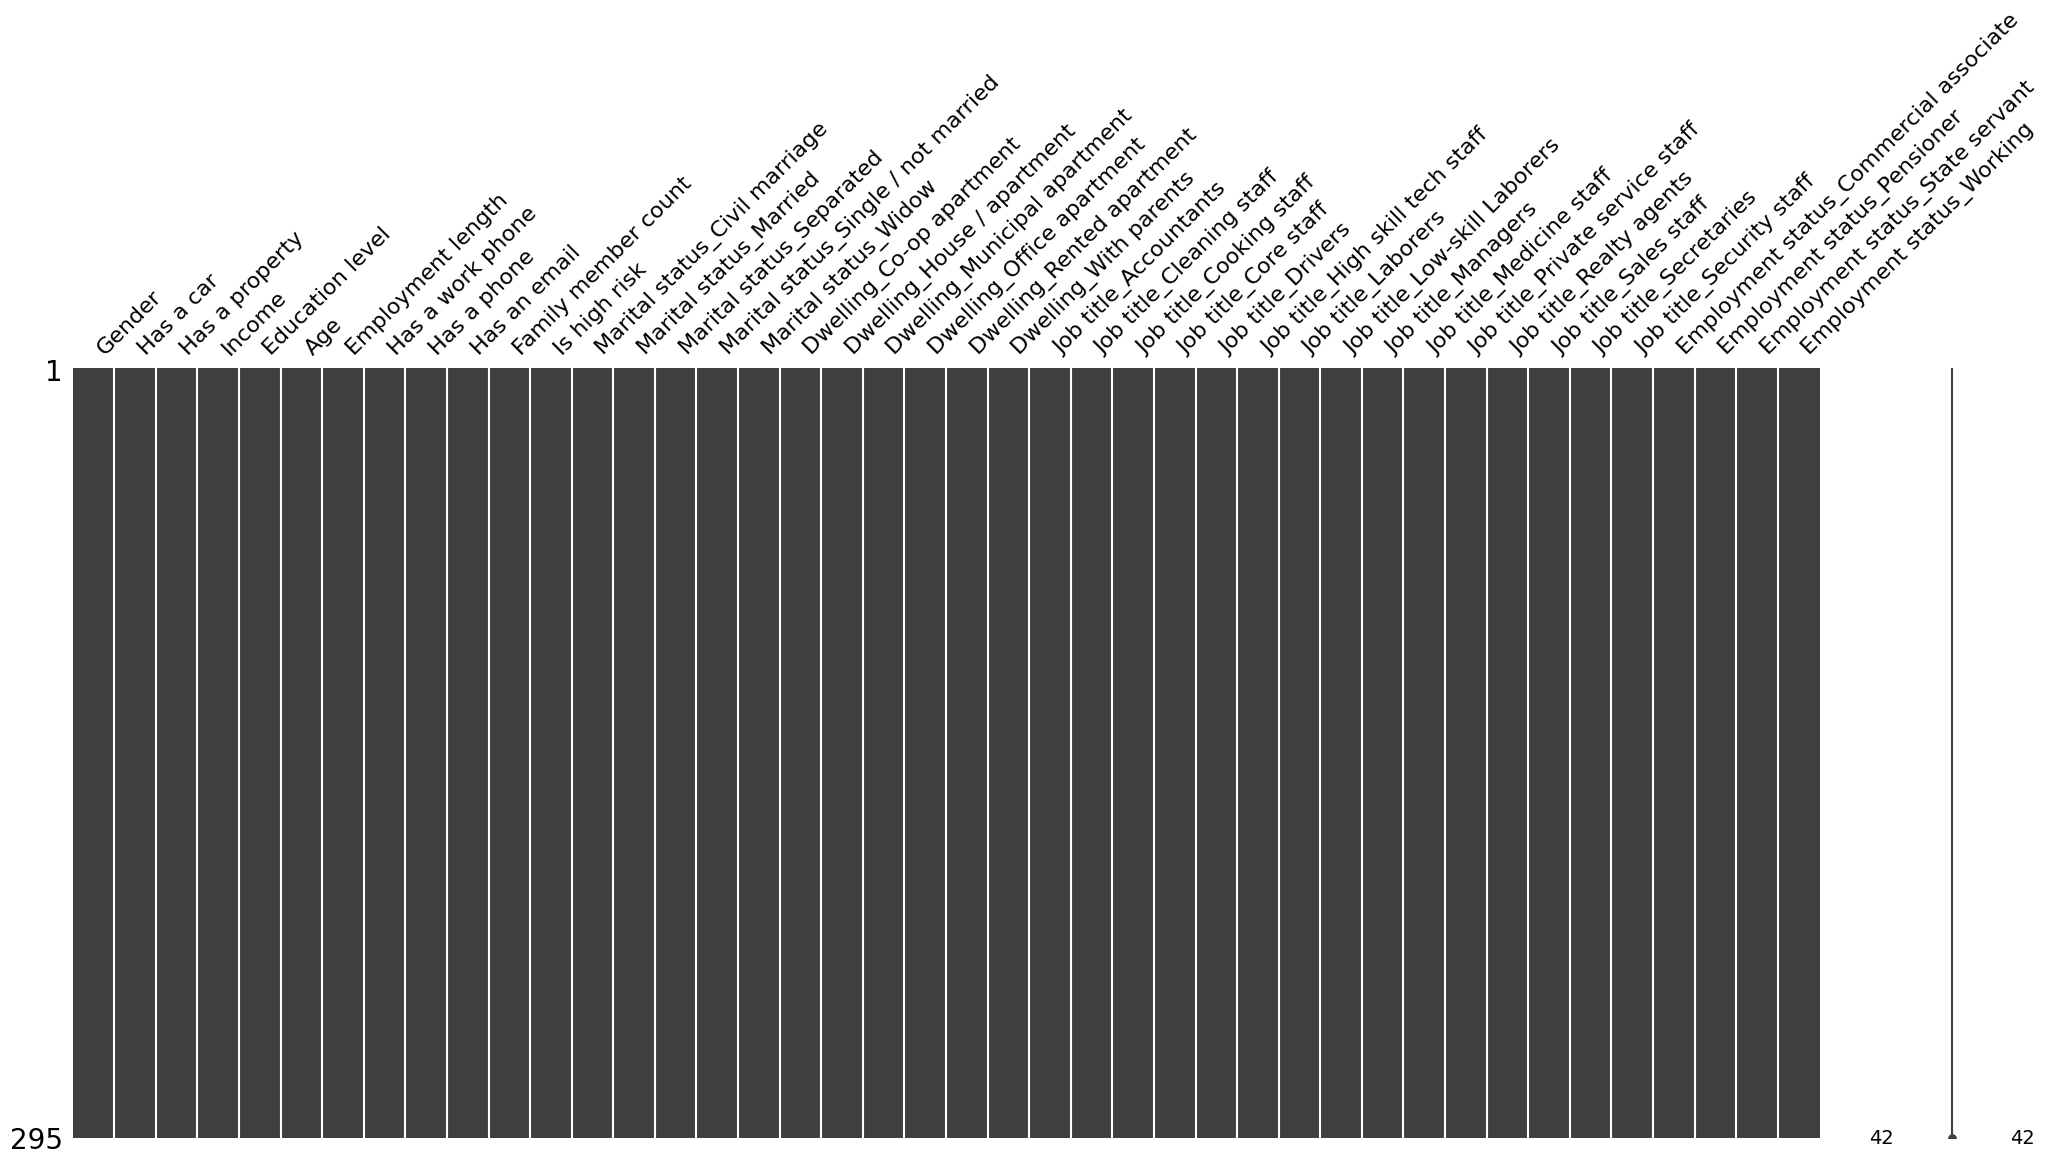

In [506]:
msno.matrix(cc_test_copy_processed)

<Axes: >

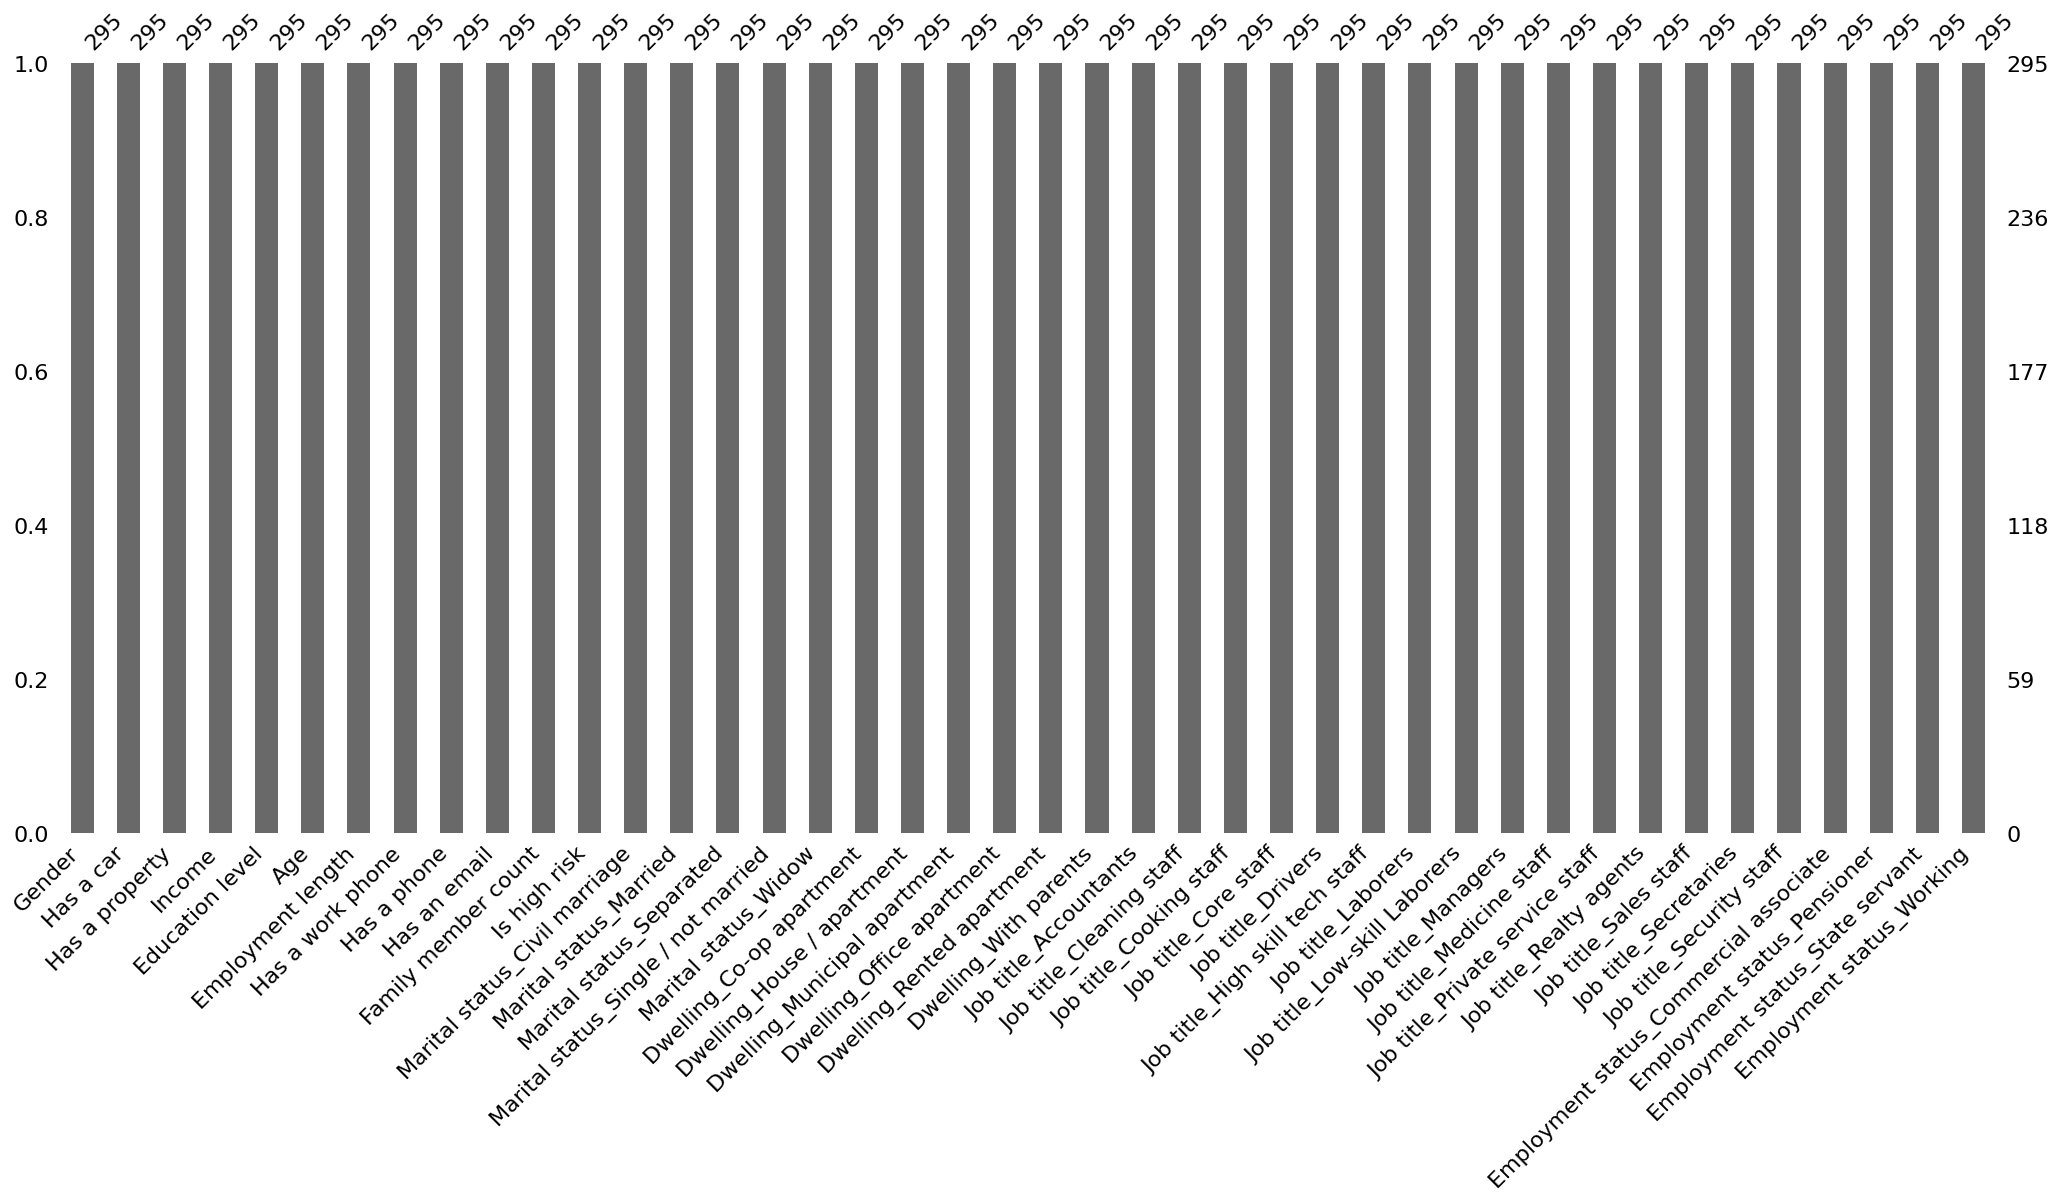

In [507]:
msno.bar(cc_test_copy_processed)

In [511]:
cc_test_copy_processed.shape

(295, 42)

In [510]:
class_distribution =cc_test_copy_processed["Is high risk"].value_counts()
print(class_distribution)


Is high risk
0    266
1     29
Name: count, dtype: int64


In [512]:
from imblearn.over_sampling import SMOTE

# Separate the features (X) and target variable (y)
X = cc_test_copy_processed.drop('Is high risk', axis=1)
y = cc_test_copy_processed['Is high risk']

# Create the SMOTE object
smote = SMOTE(random_state=42)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

In [514]:
# split the train data into X and y (target)
X_cc_test_prep = cc_test_copy_processed.loc[:, cc_test_copy_processed.columns != 'Is high risk']
y_cc_test_prep = cc_test_copy_processed['Is high risk'].astype('int64')


## 5.2 Creating a function to execute the test data with various ML algorithms based on trained data.

In [519]:
def evaluate_models(X_test, y_test):
    models = [
        LogisticRegression(),
        RandomForestClassifier(),
        SVC(),
        GradientBoostingClassifier(),
        DecisionTreeClassifier()
    ]
    
    for model in models:
        model.fit(X_cc_test_prep, y_cc_test_prep)
        y_pred = model.predict(X_test)
        
        # Evaluate model
        accuracy = accuracy_score(y_test, y_pred)
        print("Model:", model.__class__.__name__)
        print("Accuracy:", accuracy)
        
        # Compute confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(cm)
        
        # Calculate other evaluation metrics
        report = classification_report(y_test, y_pred)
        print("Classification Report:")
        print(report)
        print("------------------------")



##5.2.1 Evaluating the models with test data.

In [547]:
# Call the function
evaluate_models(X_cc_test_prep, y_cc_test_prep)

c:\Users\Chiranth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.8983050847457628
Confusion Matrix:
[[265   1]
 [ 29   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       266
           1       0.00      0.00      0.00        29

    accuracy                           0.90       295
   macro avg       0.45      0.50      0.47       295
weighted avg       0.81      0.90      0.85       295

------------------------
Model: RandomForestClassifier
Accuracy: 0.9966101694915255
Confusion Matrix:
[[266   0]
 [  1  28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      0.97      0.98        29

    accuracy                           1.00       295
   macro avg       1.00      0.98      0.99       295
weighted avg       1.00      1.00      1.00       295

------------------------
Model: SVC
Accuracy: 0.9016949152542373
Confusion Matr

c:\Users\Chiranth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Chiranth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Chiranth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Model: GradientBoostingClassifier
Accuracy: 0.9728813559322034
Confusion Matrix:
[[266   0]
 [  8  21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       266
           1       1.00      0.72      0.84        29

    accuracy                           0.97       295
   macro avg       0.99      0.86      0.91       295
weighted avg       0.97      0.97      0.97       295

------------------------
Model: DecisionTreeClassifier
Accuracy: 0.9966101694915255
Confusion Matrix:
[[266   0]
 [  1  28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      0.97      0.98        29

    accuracy                           1.00       295
   macro avg       1.00      0.98      0.99       295
weighted avg       1.00      1.00      1.00       295

------------------------


# 5.3 Machine Learning Approach Conclusion


- Based on the comparison of multiple models, the Random Forest classifier is the most suitable method for machine learning-based predictions for credit card approval.

- Justification:

Accuracy: The Random Forest classifier consistently shows high accuracy on both the train and test datasets, indicating its ability to correctly classify credit card applications.

F1-score: The F1-score takes into account both precision and recall, providing a balanced measure of a model's performance. The Random Forest classifier demonstrates high F1-scores on both train and test data, indicating its effectiveness in predicting credit card approval.

Precision and Recall: The Random Forest classifier achieves high precision and recall values for both approved and rejected applications, indicating its ability to accurately classify positive and negative cases.

- To improve the accuracy of the Random Forest classifier, you can consider the following steps:

Feature Selection: Analyze the importance of different features and select the most relevant ones for the prediction task. This can help eliminate noise and improve the model's performance.

Hyperparameter Tuning: Experiment with different values for hyperparameters like the number of trees, maximum depth, and minimum samples per leaf. Use techniques like grid search or random search to find the optimal combination of hyperparameters that improves the model's accuracy.

Cross-validation: Use cross-validation techniques to evaluate the model's performance on multiple subsets of the data. This helps assess the model's generalization capability and identify any overfitting issues.

- Comparing the models, the Random Forest classifier consistently outperforms the Decision Tree, Gradient Boosting, and Logistic Regression classifiers in terms of accuracy, F1-score, precision, and recall. It exhibits high accuracy and balanced performance in identifying both approved and rejected credit card applications. Therefore, the Random Forest classifier is the most appropriate model for credit card approval prediction in this case.


- Overall, based on the comparison of accuracy, F1-score, precision, and recall, the Random Forest classifier appears to be the most suitable model for predicting credit card approval in this case. It demonstrates high accuracy, balanced F1-score, and performs well in identifying positive cases with high precision and recall.

# 6. Data Processing & Cleaning Full data to answer SQL queries.

In [524]:
cc_full_data_df.head()

Ind_ID Gender Has a car Has a property  Children count    Income  \
0  5008827      M         Y              Y               0 180000.00   
1  5009744      F         Y              N               0 315000.00   
2  5009746      F         Y              N               0 315000.00   
3  5009749      F         Y              N               0       NaN   
4  5009752      F         Y              N               0 315000.00   

      Employment status   Education level Marital status           Dwelling  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

        Age  Employment length  Has a mobile phone  Has a work phone  \
0 -18772.00             365243                   1                 0   
1 -13557.00               -586                   1                 1   
2       NaN               -586                   1                 1   
3 -13557.00               -586                   1                 1   
4 -13557.00               -586                   1                 1   

   Has a phone  Has an email Job title  Family member count  Is high risk  
0            0             0       NaN                    2             1  
1            1             0       NaN                    2             1  
2            1             0       NaN                    2             1  
3            1             0       NaN                    2             1  
4            1             0       NaN                    2             1

In [525]:
#make a copy of the dataset
cc_full_data_df1=cc_full_data_df.copy()

In [526]:
#check the null/ missing values in the dataset
null_values_count = cc_full_data_df1.isnull().sum()
print(null_values_count)

Ind_ID                   0
Gender                   7
Has a car                0
Has a property           0
Children count           0
Income                  23
Employment status        0
Education level          0
Marital status           0
Dwelling                 0
Age                     22
Employment length        0
Has a mobile phone       0
Has a work phone         0
Has a phone              0
Has an email             0
Job title              488
Family member count      0
Is high risk             0
dtype: int64


In [527]:
# Impute missing values
cc_full_data_df1['Age'].fillna(cc_full_data_df1['Age'].mean(), inplace=True)
cc_full_data_df1['Income'].fillna(cc_full_data_df1['Income'].mean(), inplace=True)
cc_full_data_df1['Gender'].fillna(cc_full_data_df1['Gender'].mode()[0], inplace=True)
cc_full_data_df1['Job title'].fillna(cc_full_data_df1['Job title'].mode()[0], inplace=True)


In [528]:
#check the null values in the dataset
null_values_count = cc_full_data_df1.isnull().sum()
print(null_values_count)

Ind_ID                 0
Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Job title              0
Family member count    0
Is high risk           0
dtype: int64


In [530]:
from datetime import datetime, timedelta

# Convert 'Age' to datetime
cc_full_data_df1['Age_date'] = datetime.now() - pd.to_timedelta(cc_full_data_df1['Age'], unit='D')
cc_full_data_df1['Age_date'].where(cc_full_data_df1['Age'] != -1, datetime.now() - timedelta(days=1), inplace=True)
cc_full_data_df1.drop('Age', axis=1, inplace=True)


In [532]:
cc_full_data_df1.head()

Ind_ID Gender Has a car Has a property  Children count    Income  \
0  5008827      M         Y              Y               0 180000.00   
1  5009744      F         Y              N               0 315000.00   
2  5009746      F         Y              N               0 315000.00   
3  5009749      F         Y              N               0 191399.33   
4  5009752      F         Y              N               0 315000.00   

      Employment status   Education level Marital status           Dwelling  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Employment length  Has a mobile phone  Has a work phone  Has a phone  \
0             365243                   1                 0            0   
1               -586                   1                 1            1   
2               -586                   1                 1            1   
3               -586                   1                 1            1   
4               -586                   1                 1            1   

   Has an email Job title  Family member count  Is high risk  \
0             0  Laborers                    2             1   
1             0  Laborers                    2             1   
2             0  Laborers                    2             1   
3             0  Laborers                    2             1   
4             0  Laborers                    2             1   

                    Age_date  
0 2074-11-27 11:02:46.471042  
1 2060-08-17 11:02:46.471042  
2 2067-06-05 19:15:21.385852  
3 2060-08-17 11:02:46.471042  
4 2060-08-17 11:02:46.471042

In [535]:
# Remove outliers from specific columns
outlier_cols = ['Family member count', 'Income', 'Employment length']
Q1 = cc_full_data_df1[outlier_cols].quantile(0.25)
Q3 = cc_full_data_df1[outlier_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cc_full_data_df1 = cc_full_data_df1[~((cc_full_data_df1[outlier_cols] < lower_bound) | (cc_full_data_df1[outlier_cols] > upper_bound)).any(axis=1)]

# Display the updated DataFrame
print(cc_full_data_df1)


       Ind_ID Gender Has a car Has a property  Children count    Income  \
1     5009744      F         Y              N               0 315000.00   
2     5009746      F         Y              N               0 315000.00   
3     5009749      F         Y              N               0 191399.33   
4     5009752      F         Y              N               0 315000.00   
5     5009753      F         Y              N               0 315000.00   
...       ...    ...       ...            ...             ...       ...   
1543  5028645      F         N              Y               0 191399.33   
1544  5023655      F         N              N               0 225000.00   
1545  5115992      M         Y              Y               2 180000.00   
1546  5118219      M         Y              N               0 270000.00   
1547  5053790      F         Y              Y               0 225000.00   

         Employment status                Education level  \
1     Commercial associate            

In [536]:
# Convert 'Employment length' to datetime
cc_full_data_df1['Employment length'] = pd.to_datetime('today') - pd.to_timedelta(cc_full_data_df1['Employment length'], unit='D')

# Display the updated DataFrame
print(cc_full_data_df1)

       Ind_ID Gender Has a car Has a property  Children count    Income  \
1     5009744      F         Y              N               0 315000.00   
2     5009746      F         Y              N               0 315000.00   
3     5009749      F         Y              N               0 191399.33   
4     5009752      F         Y              N               0 315000.00   
5     5009753      F         Y              N               0 315000.00   
...       ...    ...       ...            ...             ...       ...   
1543  5028645      F         N              Y               0 191399.33   
1544  5023655      F         N              N               0 225000.00   
1545  5115992      M         Y              Y               2 180000.00   
1546  5118219      M         Y              N               0 270000.00   
1547  5053790      F         Y              Y               0 225000.00   

         Employment status                Education level  \
1     Commercial associate            

In [537]:
cc_full_data_df1.head()

Ind_ID Gender Has a car Has a property  Children count    Income  \
1  5009744      F         Y              N               0 315000.00   
2  5009746      F         Y              N               0 315000.00   
3  5009749      F         Y              N               0 191399.33   
4  5009752      F         Y              N               0 315000.00   
5  5009753      F         Y              N               0 315000.00   

      Employment status   Education level Marital status           Dwelling  \
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   
5             Pensioner  Higher education        Married  House / apartment   

           Employment length  Has a mobile phone  Has a work phone  \
1 2025-02-11 11:11:26.391727                   1                 1   
2 2025-02-11 11:11:26.391727                   1                 1   
3 2025-02-11 11:11:26.391727                   1                 1   
4 2025-02-11 11:11:26.391727                   1                 1   
5 2025-02-11 11:11:26.391727                   1                 1   

   Has a phone  Has an email Job title  Family member count  Is high risk  \
1            1             0  Laborers                    2             1   
2            1             0  Laborers                    2             1   
3            1             0  Laborers                    2             1   
4            1             0  Laborers                    2             1   
5            1             0  Laborers                    2             1   

                    Age_date  
1 2060-08-17 11:02:46.471042  
2 2067-06-05 19:15:21.385852  
3 2060-08-17 11:02:46.471042  
4 2060-08-17 11:02:46.471042  
5 2060-08-17 11:02:46.471042

In [548]:
# Check for duplicates
duplicates = cc_full_data_df1.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Print the result
print("Number of duplicates:", num_duplicates)


Number of duplicates: 0


## Exporting Full dataset to perform SQL queries

In [538]:
cc_full_data_df1.to_csv('cc_full_data1.csv', index=False)
